In [1]:
# !ollama pull llava:7b-v1.6-mistral-q4_0
# !ollama list



In [1]:
from unstructured.partition.pdf import partition_pdf
from langchain_core.runnables import RunnableLambda,RunnablePassthrough
from langchain.chat_models import ChatOpenAI
from langchain.schema import StrOutputParser
from langchain.prompts import ChatPromptTemplate
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
import pickle

from unstructured.documents.elements import (
    CoordinatesMetadata,
    Element,
    ElementMetadata,
    ElementType,
    Image,
    Link,
    ListItem,
    PageBreak,
    Text,
    Title,
)

import pickle
import os

In [ ]:
# raw_pdf_element2 = partition_pdf(
#     filename="./RAG4_MBBS_MM/The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf",
#     strategy="hi_res",
#     extract_images_in_pdf=True,
#     extract_image_block_types=["Image","Table"],
#     extract_image_block_to_payload=False,
#     extract_image_block_output_dir="./RAG4_MBBS_MM/med_image_folder_02/extracted_data/",
#     # CoordinatesMetadata:True
    
# )

In [2]:
save_path = r"D:\web dev backup\Pytorch\RAG4_MBBS_MM\Gale\02"
# os.makedirs(save_path, exist_ok=True)


In [6]:

with open(os.path.join(save_path, "Gale_med_book_02.pkl"), "rb") as f:
    raw_pdf_element2 = pickle.load(f)

In [7]:

with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
    pickle.dump(raw_pdf_element2, f)

In [ ]:
# new_list1 = [row for row in new_list1.to_dict(orient="records")]
# 
# new_list2=[]
# for i in range(0,len(new_list1)-1):
#     new_list2.append(new_list1[i].to_dict())

# with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
#     pickle.dump(new_list2, f)

In [3]:
with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "rb") as f:
    new_list1 = pickle.load(f)

In [ ]:
with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [3]:
with open(os.path.join(save_path, "new_Gale_med_book_11.pkl"), "rb") as f:
    new_list11 = pickle.load(f)

In [3]:
with open(os.path.join(save_path, "new_Gale_med_book_07.pkl"), "rb") as f:
    new_list7 = pickle.load(f)

In [18]:
new_list1[0]

{'type': 'Title',
 'element_id': '87356d9e5613b3869e85cc01cbf7e6d7',
 'text': 'The GALE ENCYCLOPEDIA ofMEDICINE SECOND EDITION',
 'metadata': {'detection_class_prob': 0.41670843958854675,
  'coordinates': {'points': ((503.270263671875, 352.61388888888894),
    (503.270263671875, 788.4170532226562),
    (1198.2982177734375, 788.4170532226562),
    (1198.2982177734375, 352.61388888888894)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-10-05T22:47:04',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 1,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf'}}

In [11]:
unique_types = list({item.to_dict()["type"] for item in new_list1})
print(unique_types)


['ListItem', 'Header', 'Table', 'NarrativeText', 'UncategorizedText', 'FigureCaption', 'Image', 'Title']


In [19]:
new_list1= [element for element in new_list1 if element['type']!="Header" ]

with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
    pickle.dump(new_list1, f)

In [14]:
# new_list1 = new_list1[369:]
# with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
#     pickle.dump(new_list1, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_03.pkl"), "rb") as f:
    new_list3 = pickle.load(f)

In [15]:
new_list3 = [
    element for element in new_list3
    if not any(kw in element['text'] for kw in ["GALE ENCYCLOPEDIA OF MEDICINE 2", "see"]) 
]
len(new_list3)



19462

In [ ]:
# with open(os.path.join(save_path, "new_Gale_med_book_02.pkl"), "wb") as f:
#     pickle.dump(new_list3, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_02.pkl"), "rb") as f:
    new_list2 = pickle.load(f)

In [37]:
import re

keywords = [
    "PAUL NIEHANS (1882–1971)",
    "DR. BENJAMIN SPOCK (1903–1998)",
    "DANIEL PALMER (1845–1913)",
    "Julia Barrett",
    "DOROTHY ANDERSEN, MD (1901–1963)",
    "Beth A. Kapes",
    "ELISABETH KÜBLER-ROSS (1926– )",
    "Lori De Milto",
    "WILLIAM SUTHERLAND (1873–1954)",
    "Howard Baker",
    "MOSHE FELDENKRAIS (1904–1984)",
    "Jill S. Lasker",
    "EDWARD BACH (1886–1936)"
]

new_list2 = [
    element
    for element in new_list2
    if not re.match(r"\d+", element.get('text', ''))
    and not any(kw in element.get('text', '') for kw in keywords)
]

len(new_list2)


18664

In [38]:
with open(os.path.join(save_path, "new_Gale_med_book_04.pkl"), "wb") as f:
    pickle.dump(new_list2, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_04.pkl"), "rb") as f:
    new_list4 = pickle.load(f)

In [51]:
unique = []
for i,element in enumerate(new_list4):
    if element['type'] == "Title" and element['text'] not in unique and element['metadata']['classification']!="Yes" :
        unique.append(f"{i} | {element['text']}")

print(len(unique))  

4509


In [ ]:
for element in new_list4:
    if element['type']=="ListItem" and "•" in element['text'] :
        
        element['type']="ListItem"
    
with open(os.path.join(save_path, "new_Gale_med_book_05.pkl"), "wb") as f:
    pickle.dump(new_list4, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_05.pkl"), "rb") as f:
    new_list5 = pickle.load(f)

In [53]:
list = [ element for element in new_list4 
        
        if element['type']=="ListItem"
            
    ]

len(list)

3847

In [ ]:
i = 0
while i < len(new_list5):
    current_element = new_list5[i]
    
    # Check if current element is a ListItem containing "•"
    if current_element.get('type') == "ListItem" and "•" in current_element.get('text', ''):
        j = i + 1
        # Merge consecutive ListItems with "•"
        while j < len(new_list5):
            next_element = new_list5[j]
            if next_element.get('type') == "ListItem" and "•" in next_element.get('text', ''):
                # Replace "•" with comma and strip
                next_text = next_element['text'].replace("•", ",").strip()
                # Append to current element
                current_element['text'] = current_element['text'].rstrip() + " " + next_text
                # Remove merged element
                new_list5.pop(j)
                # Don't increment j because list shifted
            else:\
                break  # Stop if next element is not a ListItem with "•"
    i += 1

        
        
    
with open(os.path.join(save_path, "new_Gale_med_book_06.pkl"), "wb") as f:
    pickle.dump(new_list5, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_06.pkl"), "rb") as f:
    new_list6 = pickle.load(f)

In [70]:
for i,element in enumerate(new_list6):
    if element['type']=="ListItem" and "•" in element['text'] :
        
        element['text'] = element['text'].replace("•", "").strip()

with open(os.path.join(save_path, "new_Gale_med_book_07.pkl"), "wb") as f:
    pickle.dump(new_list6, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_07.pkl"), "rb") as f:
    new_list7 = pickle.load(f)

In [7]:
    
with open(os.path.join(save_path, "new_Gale_med_book_07.pkl"), "rb") as f:
    new_list7 = pickle.load(f)

In [9]:
    
with open(os.path.join(save_path, "new_Gale_med_book_08.pkl"), "rb") as f:
    new_list8= pickle.load(f)

In [16]:
for element in new_list8:

    text = text.replace("-\n", "").replace("- ", "")

        
        

with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "wb") as f:
    pickle.dump(new_list8, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [28]:
new_list9 = [  element for element in new_list9 if element['type']!="FigureCaption" and element['type']!="Image" ]

with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "wb") as f:
    pickle.dump(new_list9, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [31]:
with open("14_uncat_02.txt","w",encoding="utf-8") as f:
    
    for i,element in enumerate(new_list9):
    
        if element['type']=="UncategorizedText" :
            f.write(f"{i} | {element['text']} \n")
        

In [29]:
unique = []
for i,element in enumerate(new_list9):
   if element['type'] not in unique :
       unique.append(element['type'])

print(len(unique))  
print(unique)

5
['Title', 'NarrativeText', 'ListItem', 'UncategorizedText', 'Table']


In [17]:
for i,element in enumerate(new_list9):
    if element['type']=="ListItem"  :
        
        print(f"{i} | {element['text']}")

29 | peptic ulcer , heart arrhythmias or palpitations , heart disease or recent heart attack (within a few weeks) , high blood pressure , liver disease , insomnia (trouble sleeping) , anxiety or panic attacks , agoraphobia (fear of being in open places) , premenstrual syndrome (PMS).
78 | breathing problems, coughing or wheezing , irregular, fast, or pounding heartbeat , slow heartbeat (less than 50 beats per minute) , skin rash , swollen ankles, feet, or lower legs.
82 | Diuretics (water pills) This type of medicine may cause low levels of potassium in the body, which may increase the chance of unwanted effects from some cal- cium channel blockers , Beta-blockers, such as atenolol (Tenormin), propra- nolol (Inderal), and metoprolol (Lopressor), used to treat high blood pressure, angina, and other conditions Also, eye drop forms of beta blockers, such as timolol (Timoptic), used to treat glaucoma Taking any of these drugs with calcium channel blockers may increase the effects of both t

In [12]:
for i,element in enumerate(new_list9):
    if element['type']=="ListItem"  :
        
        print(f"{i} | {element['text']}")

29 | peptic ulcer , heart arrhythmias or palpitations , heart disease or recent heart attack (within a few weeks) , high blood pressure , liver disease , insomnia (trouble sleeping) , anxiety or panic attacks , agoraphobia (fear of being in open places) , premenstrual syndrome (PMS).
78 | breathing problems, coughing or wheezing , irregular, fast, or pounding heartbeat , slow heartbeat (less than 50 beats per minute) , skin rash , swollen ankles, feet, or lower legs.
82 | Diuretics (water pills) This type of medicine may cause low levels of potassium in the body, which may increase the chance of unwanted effects from some cal- cium channel blockers , Beta-blockers, such as atenolol (Tenormin), propra- nolol (Inderal), and metoprolol (Lopressor), used to treat high blood pressure, angina, and other conditions Also, eye drop forms of beta blockers, such as timolol (Timoptic), used to treat glaucoma Taking any of these drugs with calcium channel blockers may increase the effects of both t

In [ ]:
# for i,element in enumerate(new_list9):
#     if element['type']=="ListItem"  :
        
#         print(f"{i} | {element['text']}")
# with open("14_test_title.txt" , "w",encoding="utf-8") as f:
#     for element in unique:
#         f.write(f"{element} \n")

In [ ]:
# Read 14_title.txt into a list
with open("14_title.txt", "r", encoding="utf-8") as f:
    title_lines = [line.strip() for line in f.readlines()]

# Update new_list1
for element in new_list1:
    if element['type'] == "Title":  # ignore case
        if element['text'].strip() in title_lines:
            element['metadata']['classification'] = "Yes"
            
        else:
            element['metadata']['classification'] = "No"
            

with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
    pickle.dump(new_list1, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "rb") as f:
    new_list1 = pickle.load(f)

In [43]:
count = sum(1 for element in new_list1 if element['type'] == "Title" and element['metadata']['classification']=="Yes")
print(count)


354


In [50]:
# Collect (original index, text) where classification is 'Yes'
classified_titles = [
    (i, element['text'])
    for i, element in enumerate(new_list1)
    if element.get('metadata', {}).get('classification') == "Yes"
]

# Save to 14_title_01_02.txt
with open("14_title_02_02.txt", "w", encoding="utf-8") as f:
    for idx, title in classified_titles:
        f.write(f"{idx} | Title | {title} | Yes\n")




In [72]:
from collections import defaultdict

# Track chunks for texts with classification == "Yes"
text_chunks = defaultdict(list)

for i, element in enumerate(new_list1):
    if element.get('metadata', {}).get('classification') == "Yes":
        text_chunks[element['text']].append(i)  # store chunk index

# Filter only duplicates
duplicates = {text: chunks for text, chunks in text_chunks.items() if len(chunks) > 1}

# Print duplicates and their chunks
for text, chunks in duplicates.items():
    print(f"Text: {text}")
    print(f"Chunks: {chunks}")
    print("-" * 40)


In [85]:
with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
    pickle.dump(new_list1, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "rb") as f:
    new_list1 = pickle.load(f)
    
    

new_list1[199]['metadata']['classification']="Yes"


# Collect (original index, text) where classification is 'Yes'
classified_titles = [
    (i, element['text'])
    for i, element in enumerate(new_list1)
    if element.get('metadata', {}).get('classification') == "Yes"
]

# Save to 14_title_01_02.txt
with open("14_title_02_02.txt", "w", encoding="utf-8") as f:
    for idx, title in classified_titles:
        f.write(f"{idx} | Title | {title} | Yes\n")



with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
    pickle.dump(new_list1, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "rb") as f:
    new_list1 = pickle.load(f)


In [91]:
for element in new_list1:
    # Ensure 'metadata' exists
    metadata = element.setdefault('metadata', {})
    
    # If 'classification' is already "Yes", skip
    if metadata.get('classification') == "Yes":
        continue
    else:
        # Otherwise, set it to "No"
        metadata['classification'] = "No"

with open(os.path.join(save_path, "new_Gale_med_book_01_01.pkl"), "wb") as f:
    pickle.dump(new_list1, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "rb") as f:
    new_list1 = pickle.load(f)

In [93]:
new_list1[200]

{'type': 'Title',
 'element_id': '6ed54df205a54d9aee43f7380952edff',
 'text': 'Definition',
 'metadata': {'detection_class_prob': 0.8574550747871399,
  'coordinates': {'points': ((900.0, 1073.273681640625),
    (900.0, 1110.8355555555556),
    (1036.6451416015625, 1110.8355555555556),
    (1036.6451416015625, 1073.273681640625)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-10-05T22:47:04',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 20,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf',
  'parent_id': '53712d68696b16efc25d5d3c6f7c6813',
  'classification': 'No'}}

In [94]:
# Read 14_title_02.txt into a set with stripped and lowercase lines
with open("14_title_02.txt", "r", encoding="utf-8") as f:
    existing_texts = set(line.strip().lower() for line in f.readlines())

# Collect texts from new_list1 where classification == "Yes" and normalize
yes_texts = [
    element['text'].strip().lower()
    for element in new_list1
    if element.get('metadata', {}).get('classification') == "Yes"
]

# Find texts that are Yes in new_list1 but not in 14_title_02.txt
missing_texts = [text for text in  existing_texts if text not in yes_texts]

print(f"Total missing texts: {len(missing_texts)}")
print(missing_texts)



Total missing texts: 1
['']


In [45]:
with open(os.path.join(save_path, "new_Gale_med_book_11.pkl"), "rb") as f:
    new_list11 = pickle.load(f)

In [18]:
# new_list11 = [element for element in new_list11 if element['type']!="UncategorizedText" ]
new_list11 = [element for element in new_list11 if len(element['text']) >= 30 and "see" not in element['text']]

with open(os.path.join(save_path, "new_Gale_med_book_12.pkl"), "wb") as f:
    pickle.dump(new_list11, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_12.pkl"), "rb") as f:
    new_list12 = pickle.load(f)

In [ ]:
# see = [
#     (i, element['text'])
#     for i, element in enumerate(new_list11)
#     if len(element['text']) < 100 and "see" in element['text']
# ]

# with open("14_see.txt", "w", encoding="utf-8") as f:
#     for i, text in see:
#         f.write(f"{i} | {text}\n")

        

In [ ]:
unique=[]
for i,element in enumerate(new_list11):
    if element['type']=="Title" and element['metadata']['classification']=="No" :
        
        # print(f"{i} | {element['text']}")
        unique.append(f"{i} | {element['text']}")
        
        
with open("14_test_title.txt" , "w",encoding="utf-8") as f:
    for element in unique:
        f.write(f"{element} \n")
        
        

In [46]:
for i in range(len(new_list11)):
    element = new_list11[i]
    j = i + 1

    # prevent IndexError for the last element
    if j < len(new_list11):
        # check current element condition
        if element['type'] == "Title" and element['metadata']['classification'] == "No":
            # if next element is also Title
            if new_list11[j]['type'] == "Title":
                new_list11[j]['type'] = "SubTitle"
                print(j)

with open(os.path.join(save_path, "new_Gale_med_book_12.pkl"), "wb") as f:
    pickle.dump(new_list11, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_12.pkl"), "rb") as f:
    new_list12 = pickle.load(f)

10
82
91
125
238
250
265
286
295
325
395
418
427
444
461
470
513
555
586
590
619
673
683
706
736
766
775
828
834
858
870
882
920
946
949
985
1031
1065
1097
1107
1140
1185
1199
1229
1254
1288
1324
1330
1413
1448
1460
1550
1578
1611
1627
1644
1674
1681
1738
1755
1787
1797
1834
1889
1917
1932
1975
2012
2046
2074
2098
2150
2189
2198
2218
2256
2315
2357
2390
2396
2401
2430
2447
2451
2477
2502
2519
2526
2555
2643
2715
2731
2769
2803
2837
2875
2889
2929
2962
2965
3002
3057
3077
3110
3160
3182
3229
3259
3292
3338
3389
3400
3444
3485
3526
3564
3593
3640
3659
3697
3739
3777
3786
3807
3858
3865
3913
3931
3940
3977
3990
3996
4045
4055
4061
4085
4119
4171
4200
4238
4276
4307
4363
4384
4412
4454
4466
4492
4546
4593
4626
4684
4695
4704
4735
4785
4798
4812
4842
4872
4903
4947
4983
5018
5037
5060
5089
5122
5129
5139
5157
5222
5282
5332
5389
5427
5469
5483
5501
5524
5560
5565
5587
5602
5609
5650
5660
5688
5697
5726
5744
5797
5874
5918
5955
5988
6021
6045
6083
6131
6137
6158
6200
6224
6228
6256
6283
6307

In [62]:
new_list11[0]

{'type': 'Title',
 'element_id': 'f5e9fc9d7590736c988723f5bf3f39df',
 'text': 'Caffeine',
 'metadata': {'detection_class_prob': 0.6119908094406128,
  'coordinates': {'points': ((218.44593811035156, 838.6668701171875),
    (218.44593811035156, 904.7324829101562),
    (404.06944444444446, 904.7324829101562),
    (404.06944444444446, 838.6668701171875)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-10-05T22:47:04',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 14,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf',
  'classification': 'Yes',
  'About': ''}}

In [64]:
# Ensure all elements have 'metadata' and 'classification'
for i, element in enumerate(new_list11):
    # If 'metadata' is missing or None, create an empty dict
    if 'metadata' not in element or element['metadata'] is None:
        element['metadata'] = {}
    
    # If 'classification' is missing, set it to "No"
    if 'classification' not in element['metadata']:
        print(i)
        element['metadata']['classification'] = "No"
        


2
4
6
8
11
12
13
14
15
17
18
19
20
21
23
24
25
26
27
28
30
32
33
34
35
36
39
41
43
44
45
46
47
48
49
50
52
53
55
56
57
58
59
60
61
62
63
64
66
67
68
70
71
73
74
75
76
78
80
83
85
86
88
89
94
96
98
99
100
101
102
103
104
105
106
107
108
109
111
113
114
115
117
119
121
123
126
127
128
129
131
132
133
135
137
138
141
143
144
145
146
147
148
149
150
151
152
154
155
157
159
161
163
164
166
168
170
172
174
175
176
177
179
180
181
182
183
184
185
186
187
188
189
191
192
193
195
196
197
199
201
202
204
206
208
209
210
212
213
214
215
217
218
219
221
223
224
225
226
227
228
229
230
231
232
233
234
235
236
239
240
241
242
245
247
248
251
252
253
254
255
256
257
258
260
261
262
263
266
268
270
271
272
273
275
277
279
280
281
282
284
287
289
291
293
296
297
298
300
301
302
303
306
308
309
311
313
315
317
318
319
321
323
326
327
328
329
331
333
334
335
338
340
342
343
344
345
347
349
350
351
353
354
355
357
358
359
360
362
364
365
366
367
368
369
370
371
372
373
374
375
377
378
379
381
382
384
385


In [66]:
import re

Title = ""
SubTitle = ""
new_list4 = []
unique_strings = []

# for i in range(366, 18019):
#     element = new_list2[i]
    
#     if element['text']=="Purpose" :
#         new_list2[i]['type']="Title"
        
        
        
# with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "wb") as f:
#     pickle.dump(new_list2,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_11.pkl"), "rb") as f:
    new_list11 = pickle.load(f)



for i in range(len(new_list11)):
    element = new_list11[i]
    
    # Clear the 'About' field
    new_list11[i]['metadata']['About'] = ""
    
    # If classification is Yes, store as Title
    if element['metadata']['classification'] == "Yes":
        Title = element['text']
    
    # If it's a Title but classified as No, and passes all filters
    elif (
        element['type'] == "Title"
        and element['metadata']['classification'] == "No"
        and not re.search(r"\d", element['text'])  # exclude if text has digits
        and all(
            keyword not in element['text']
            for keyword in [
                'see', 'GALE ENCYCLOPEDIA OF MEDICINE 2', "*", "+", "///", "¢", "«",
                'Ellen S. Weber', 'Rebecca J. Frey', 'Judith Sims', 'Hans & Cassady',
                'Beth Kapes', 'Beth A. Kapes', 'Judith Aston', 'Lori De Milto',
                'Judith Sims', 'JUDITH ASTON'
            ]
        )
    ):
        SubTitle = element['text']
        new_list4.append(f"{i} | {SubTitle}")  # store clean subtitles
    
    # For all other elements, attach Title and SubTitle info
    else:
        if 'Title' in locals() and 'SubTitle' in locals():
            new_list11[i]['metadata']['About'] = f"{Title} : {SubTitle}"
            new_list11[i]['text'] = f"{Title} : {SubTitle} :-> {element['text']}"
            print(new_list11[i]['metadata']['About'])

with open(os.path.join(save_path, "new_Gale_med_book_13.pkl"), "wb") as f:
    pickle.dump(new_list11,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_13.pkl"), "rb") as f:
    new_list13 = pickle.load(f)


Caffeine : Definition
Caffeine : Other considerations
Caffeine : Purpose
Caffeine : Description
Caffeine : Precautions
Caffeine : Precautions
Caffeine : Precautions
Caffeine : Precautions
Caffeine : Precautions
Caffeine : KEY TERMS
Caffeine : KEY TERMS
Caffeine : KEY TERMS
Caffeine : KEY TERMS
Caffeine : KEY TERMS
Caffeine : Special conditions
Caffeine : Special conditions
Caffeine : Special conditions
Caffeine : Special conditions
Caffeine : Special conditions
Caffeine : Special conditions
Caffeine : Side effects
Caffeine : Interactions
Caffeine : Interactions
Caffeine : Interactions
Caffeine : Interactions
Caffeine : Interactions
Calcium channel blockers : Definition
Calcium channel blockers : Purpose
Calcium channel blockers : Precautions
Calcium channel blockers : Precautions
Calcium channel blockers : Precautions
Calcium channel blockers : Precautions
Calcium channel blockers : Precautions
Calcium channel blockers : Precautions
Calcium channel blockers : Precautions
Calcium channe

In [73]:
# new_list13 = [ element for element in new_list13 if element['type']!="Title" ]

# with open(os.path.join(save_path, "new_Gale_med_book_14.pkl"), "wb") as f:
#     pickle.dump(new_list13,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_14.pkl"), "rb") as f:
    new_list14 = pickle.load(f)

In [74]:
with open(os.path.join(save_path, "new_Gale_med_book_13.pkl"), "rb") as f:
    new_list13 = pickle.load(f)

In [75]:
len(new_list13) , len(new_list14)

(14489, 9642)

In [76]:
title = [element for element in new_list13 if element['type']=="Title"  ]

print(len(title))

4847


In [10]:
uncat = [
    (i,element['text'])
    for i,element in enumerate(new_list11)
    if element['type']=="UncategorizedText"
]

with open("14_uncat_02.txt","w",encoding="utf-8") as f:
    for idx,title in uncat:
        f.write(f'{idx} | {title} \n')

In [6]:
new_list9 = [element for element in new_list9 if element['type']!="UncategorizedText"]

In [8]:

with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "wb") as f:
    pickle.dump(new_list9, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [9]:
len(new_list9)

15557

In [22]:
i = 0
while i < len(new_list9) - 1:
    element = new_list9[i]
    current_text = new_list9[i]['text']
    if element['type']!="Title" and not current_text.rstrip().endswith(('.')) :  # only strip trailing spaces for check
       
       if new_list9[i+1]['type']!="Title":
            # Merge current and next element text with a single space in between
            new_list9[i]['text'] = current_text + " " + new_list9[i+1]['text']
            # Remove the next element
            new_list9.pop(i+1)
       else:
           i+=1
       
    else:
        i += 1


with open(os.path.join(save_path, "new_Gale_med_book_10.pkl"), "wb") as f:
    pickle.dump(new_list9, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_10.pkl"), "rb") as f:
    new_list10 = pickle.load(f)

In [35]:
for element in new_list10:
    text = element['text']
    text = text.replace("-\n", "").replace("- ", "")
    element['text'] = text  # <- Save the modified text back

        
        

with open(os.path.join(save_path, "new_Gale_med_book_11.pkl"), "wb") as f:
    pickle.dump(new_list10, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_11.pkl"), "rb") as f:
    new_list11 = pickle.load(f)

In [36]:
len(new_list11)

14489

In [50]:
new_list11[97]

{'type': 'Title',
 'element_id': '7ff6ef0cbb6f4bb39cf8101697836bd8',
 'text': 'KEY TERMS',
 'metadata': {'detection_class_prob': 0.7642942070960999,
  'coordinates': {'points': ((748.6388888888888, 202.58177185058594),
    (748.6388888888888, 240.54861111111134),
    (952.7477416992188, 240.54861111111134),
    (952.7477416992188, 202.58177185058594)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-10-05T22:47:04',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 19,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'The_GALE_ENCYCLOPEDIA_of_MEDICINE_SECOND.pdf',
  'parent_id': '53712d68696b16efc25d5d3c6f7c6813',
  'classification': 'No'}}

In [340]:
# new_list9= new_list9[366:]
# new_list8= new_list8[366:]


# with open(os.path.join(save_path, "new_Gale_med_book_01_08.pkl"), "wb") as f:
#     pickle.dump(new_list8,f)

# Remove all elements with type "Header"
new_list9 = [element for element in new_list9 if element.get('type') != "Header"]


with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)
        
# with open(os.path.join(save_path, "new_Gale_med_book_01_08.pkl"), "rb") as f:
#     new_list8 = pickle.load(f)

In [ ]:
# for i in range(len(new_list9)):
#     element = new_list9[i]
#     if element.get('text') == "Purpose":
#         new_list9[i]['type'] = "Title"

with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [ ]:
# Keep only elements where text length > 20

# new_list4 = [element for element in new_list4 if len(element['text']) > 90]

# Case-insensitive check
new_list4 = [
    # element for element in new_list4
    # if not ("see" in element['text'].lower() and len(element['text']) < 130)
]


# for element in new_list4:
    # if 'text' in element:
    #     element['text'] = element['text'].replace(',', ':->', 1)

# i = 0

import os
import pickle
import re

# --- Merge NarrativeText elements ---
# i = 0
# while i < len(new_list9) - 1:  # iterate until second last element
#     element = new_list9[i]

#     if element.get('type') == "NarrativeText":
#         current_text = element.get('text', '')

#         # condition: last char not , or . OR last char is whitespace
#         if not current_text.rstrip().endswith((',', '.')) or current_text.endswith(" "):
#             # Merge current and next element text
#             new_list9[i]['text'] = current_text + " " + new_list9[i+1].get('text', '')
#             # Remove the next element
#             new_list9.pop(i+1)
#             continue  # stay at same i to check again after merging

#     i += 1  # move to next element if no merge happened

# --- Update type for "Purpose" elements ---
# for i in range(len(new_list9)):
#     element = new_list9[i]
#     if element.get('text') == "Purpose":
#         new_list9[i]['type'] = "Title"

# --- Remove or update UncategorizedText elements ---
import re

keywords = ['+', '*', "|","<",">","_",'American',"National","see","poolg","pooyg","Like","}","sseoqy","ssaaqy","Acne","auoy","QUIURTY","or reverses the progression of AD","atypical",
            "stomach","Adodsoysuoig","aanssaadnoy", "Risk of acquiring HIV infection by entry site", "impairment",
    "AwoyouwsKinauy", "Lori De Milto", "eursuy", "Adesayyewory", "AdodsoayyAy", "T-cell",
    "flutter", "training", "Charles. A Parent’s Guide Autism", "Bed-wetting", "registry",
    "Demographics", "interactions with cholesterol levels and effects on nerve","Teratogens","Anxiety","Brand",
    "stomach, and other organs.", "atypical"]
allowed_sections = [
    "Description", "Preparation", "Prognosis", "Diagnosis", "Symptoms", "Precaution",
    "Origins", "Self-treatment", "Availability", "Complications","registry","test","Surgery","Drugs","Actinomycosis", "Acupressure", "Acupuncture", "glomerulonephritis", "test", "syndrome",
    "Aging", "Alcoholism or other drug abuse", "aspergillosis", "Decongestants", "Drugs",
    "screening", "Amino", "Hypothyroidism", "sclerosis", "Angiogram",
    "Angiotensin-converting enzyme inhibitors", "enzyme inhibitors", "Anoscopy", "colitis",
    "Tamoxifen", "(ADH) test", "Appendectomy", "Aromatherapy", "Arthroscopy", "Atherectomy",
    "(ADHD)", "disorder (ADHD)", "Audiometry", "Benzodiazepines", "Hemangiomas", "Surgery", "disease",
    "Blastomycosis", "Screening","drugs",
]

ListItem = ["Accupril"]

i = 0
while i < len(new_list9):
    element = new_list9[i]

    if element.get('type') == "UncategorizedText":
        text = element.get('text', '').strip()

        # If text contains any allowed_section keyword -> change type to Title
        if any(allowed in text for allowed in allowed_sections):
            element['type'] = "Title"
        # Else remove if contains keyword, digits, or too short
        elif "Accupril" in element['text']:  # threshold for drug/medicine list
            element['type'] = "NarrativeText"
            
        elif (
            any(kw in text for kw in keywords) or
            re.search(r'\d', text) or
            len(text) <= 3
        ):
            new_list9.pop(i)
            continue  # don't increment i, list shifted

    i += 1

# --- Count Yes and No in metadata classification ---
yes_count = sum(
    1 for element in new_list9 
    if element.get('metadata', {}).get('classification') == "Yes"
)

no_count = sum(
    1 for element in new_list9 
    if element.get('metadata', {}).get('classification') == "No"
)

print(f"Yes count: {yes_count}")
print(f"No count: {no_count}")

# --- Save the processed list ---
  # make sure this path exists
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9, f)


Yes count: 286
No count: 16239


In [27]:
with open(os.path.join(save_path, "new_Gale_med_book_01_07.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
    
# with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
#     new_list9 = pickle.load(f)

In [20]:
    
with open(os.path.join(save_path, "new_Gale_med_book_01_07.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [44]:
i = 0
while i < len(new_list9) - 1:  # iterate until second last element
    element = new_list9[i]

    if element.get('type') == "NarrativeText":
        current_text = element.get('text', '').rstrip()  # strip trailing spaces for safety

        # ✅ Case 1: If ends with ':' → merge with next
        if current_text.endswith(':'):
            new_list9[i]['text'] = current_text + " " + new_list9[i + 1].get('text', '')
            new_list9.pop(i + 1)
            continue  # check again at same i after merging

    i += 1  # move to next element if no merge happened


with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "wb") as f:
    pickle.dump(new_list9, f)

In [45]:
    
with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "rb") as f:
    new_list6 = pickle.load(f)

In [ ]:
# arr =  [item for item in new_list6 if item['type']=="NarrativeText" and not item["text"].endswith(('.', ','))]

# arr[101]

{'type': 'NarrativeText',
 'element_id': 'b960c77bdddc470e756195e86b4d7f6e',
 'text': 'Acyclovir see Antiviral drugs',
 'metadata': {'detection_class_prob': 0.6303799748420715,
  'coordinates': {'points': ((190.57936096191406, 1531.500244140625),
    (190.57936096191406, 1565.7611083984375),
    (605.1141967773438, 1565.7611083984375),
    (605.1141967773438, 1531.500244140625)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 64,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '855ac1994238c09eab2c78b0b08116be',
  'classification': 'No'}}

In [ ]:
# count = sum(1 for item in new_list6 if item['type']=="NarrativeText" and not item["text"].endswith(('.', ','," ")))
# print("Count:", count)


Count: 1417


In [ ]:
# output_file = os.path.join("14_new_new.txt")

# with open(output_file, "w", encoding="utf-8") as f:
#     for i, element in enumerate(new_list9):
#         if element['metadata'].get('classification') == "Yes":
#             elem_type = element.get('type', 'Unknown')
#             text = element.get('text', '').replace("\n", " ").strip()
#             classification = element['metadata']['classification']
#             f.write(f"{i} | {elem_type} | {text} | {classification}\n")

# print("Saved all 'Yes' classified elements to 14_new.txt")


Saved all 'Yes' classified elements to 14_new.txt


In [ ]:
# i = 0
# while i < len(new_list9) - 1:
#     element = new_list9[i]

#     if element.get('type') == "NarrativeText":
#         current_text = element['text']

#         # If text ends with ".", do nothing
#         if current_text.endswith('.'):
#             i += 1
#         else:
#             # Merge current and next element text with a space
#             element['text'] = current_text + " " + new_list9[i+1]['text']
#             # Remove the next element
#             new_list9.pop(i+1)
#     else:
#         i += 1



# with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
#     pickle.dump(new_list9,f)

In [358]:
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)


In [ ]:
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)


In [366]:
len(new_list9)

11802

In [320]:
new_list9[0]

{'type': 'Title',
 'element_id': '6cffdab93c576f9f8fb5b40439ce5582',
 'text': 'Abdominal ultrasound Definition aa? Ultrasound technology allows doctors to “see inside a patient without resorting to surgery. A transmit- ter sends high frequency sound waves into the body, where they bounce off the different tissues and organs to produce a distinctive pattern of echoes. A receiver “hears” the returning echo pattern and forwards it to a computer, which translates the data into an image on a television screen. Because ultrasound can distinguish subtle variations between soft, fluid-filled tissues, it is particularly useful in providing diagnostic images of the abdomen. Ultrasound can also be used in treatment.',
 'metadata': {'detection_class_prob': 0.808811604976654,
  'coordinates': {'points': ((239.1466522216797, 1041.8055419921875),
    (239.1466522216797, 1087.55859375),
    (655.3895874023438, 1087.55859375),
    (655.3895874023438, 1041.8055419921875)),
   'system': 'PixelSpace',
   

In [386]:
len(new_list9)

16525

In [24]:
# new_list9[1323]['text'] = "Addison disease"
# new_list9[1408]['text'] = "Adenovirus infections"
# new_list9[1795]['text'] = "Aging"
# new_list9[4028]['text'] = "Amyloidosis"
# new_list9[4094]['text'] = "Amyotrophic lateral sclerosis"
# new_list9[4229]['text'] = "Anal atresia"
# new_list9[4317]['text'] = "Anal warts"
# new_list9[5335]['text'] = "Animal bite infections"
# new_list9[6447]['text'] = "Anticancer drugs"
# new_list9[7340]['text'] = "Antihistamines"
# new_list9[7458]['text'] = "Anti-insomnia drugs"
# new_list9[8524]['text'] = "Anxiety"
# new_list9[8684]['text'] = "Aortic aneurysm"
# new_list9[8830]['text'] = "Apgar testing"
# new_list9[9055]['text'] = "Appendicitis"
# new_list9[9106]['text'] = "Applied kinesiology"
# new_list9[9272]['text'] = "Aromatherapy"
# new_list9[10952]['text'] = "Auditory integration training"
# new_list9[12123]['text'] = "Autism"
# new_list9[16136]['text'] = "Bruxism"
# new_list9[3991]['text'] = "Amylase tests"
new_list9[11010]['text'] = "Autism"
# new_list3[8199]['metadata']['classification']="Yes"


# new_list9[5781]['metadata']['classification']="No"
# new_list9[5909]['metadata']['classification']="No"
# new_list9[5939]['metadata']['classification']="No"
# new_list9[5781]['metadata']['classification']="No"
# new_list9[14171]['metadata']['classification']="No"
# new_list9[14169]['metadata']['classification']="No"



with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)
    

In [ ]:
# for i in range(366, 18019):
#     element = new_list2[i]
    
#     if element['text']=="Purpose" :
#         new_list2[i]['type']="Title"
        

In [68]:
with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [355]:
unique_types = {element['type'] for element in new_list9 if 'type' in element}
print(unique_types)


{'ListItem', 'Title', 'Table', 'Image', 'NarrativeText', 'FigureCaption'}


In [356]:
with open(os.path.join(save_path, "new_Gale_med_book_01_07.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [373]:
yes_count = sum(1 for e in new_list9 if e['metadata']['classification'] == "Yes")
no_count  = sum(1 for e in new_list9 if e['metadata']['classification'] == "No")

print("Yes count:", yes_count)
print("No count:", no_count)



Yes count: 286
No count: 16239


In [377]:
# Count Yes and No
yes_count = sum(1 for e in new_list9 if e['metadata']['classification'] == "Yes")
no_count  = sum(1 for e in new_list9 if e['metadata']['classification'] == "No")

print("Yes count:", yes_count)
print("No count:", no_count)

# Save i, type, text, classification to a file
# Save only elements with classification "Yes"
with open("14_new.txt", "w", encoding="utf-8") as f:
    for i, element in enumerate(new_list9):
        if element['metadata'].get('classification') == "Yes":
            elem_type = element.get('type', '')
            text = element.get('text', '').replace('\n', ' ').strip()
            f.write(f"{i} | {elem_type} | {text} | Yes\n")


Yes count: 286
No count: 16239


In [368]:
len(new_list9)

11802

In [263]:
new_list8[628]

{'type': 'NarrativeText',
 'element_id': '955fced57142c782222d43854c1fc7bf',
 'text': 'A Manual of Laboratory and Diagnostic Tests. 5th ed. Ed. Francis Fishback. Philadelphia: Lippincott, 1996. Garza, Diana, and Kathleen Becan-McBride. Phlebotomy Handbook. 4th ed. Stamford: Appleton & Lange, 1996.',
 'metadata': {'detection_class_prob': 0.593852698802948,
  'coordinates': {'points': ((184.5677490234375, 248.77444458007812),
    (184.5677490234375, 368.1597595214844),
    (787.0525512695312, 368.1597595214844),
    (787.0525512695312, 248.77444458007812)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 38,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '1f32f783e5ecaf72a5a43d614a3e09ee',
  'classification': 'No'}}

In [353]:
# Collect indices and texts for UncategorizedText
uncat_data = [(i, element['text']) 
              for i, element in enumerate(new_list9) 
              if element.get('type') == "UncategorizedText"]

# Save to file
with open("14_uncat.txt", "w", encoding="utf-8") as f:
    for i, text in uncat_data:
        f.write(f"{i} | {text}\n")

print("Saved", len(uncat_data), "UncategorizedText elements to 14_uncat.txt")


Saved 0 UncategorizedText elements to 14_uncat.txt


In [50]:
unique_endings = set()

for element in new_list9:
    if element.get("type") == "NarrativeText":
        text = element.get("text", "").strip()
        if text:  # ensure it's not empty
            unique_endings.add(text[-1])  # take the last character

print("✅ Unique ending characters for type='NarrativeText':")
print(unique_endings)
print("Total unique endings:", len(unique_endings))


✅ Unique ending characters for type='NarrativeText':
{'2', '%', 'y', '1', 'x', 'd', 'B', '-', 'C', 'S', 'E', 'p', '4', '.', 'n', 's', '0', 'i', 'g', 'L', 'r', 'D', '”', 'e', '—', 'T', 'M', 'h', 't', '/', 'N', 'c', 'H', '5', ')', '?', 'm', 'b', 'o', '8', 'P', 'k', 'V', 'w', ',', 'a', 'z', '(', 'A', '}', 'l', 'f', '6'}
Total unique endings: 53


✅ File created successfully at: 14_test_test.txt


In [69]:
len(new_list9)

16142

In [ ]:
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [70]:
# Iterate backwards to safely pop elements
for i in range(len(new_list9) - 1, -1, -1):
    element = new_list9[i]
    if element.get("type") == "NarrativeText":
        text = element.get("text", "").strip()
        if text and text[-1].isdigit():  # check if ends with a number
            new_list9.pop(i)

print("✅ Removed all NarrativeText elements ending with a number.")
print("Remaining elements:", len(new_list9))

with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

✅ Removed all NarrativeText elements ending with a number.
Remaining elements: 16109


In [72]:
with open(os.path.join(save_path, "new_Gale_med_book_01_07.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
    
# with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
#     new_list9 = pickle.load(f)

In [60]:
i = 0
while i < len(new_list9) - 1:  # iterate until second last element
    element = new_list9[i]

    if element.get('type') == "NarrativeText":
        current_text = element.get('text', '').rstrip()  # strip trailing spaces for safety

        # ✅ Case 1: If ends with ':' → merge with next
        if current_text.endswith('-'):
            new_list9[i]['text'] = current_text + " " + new_list9[i + 1].get('text', '')
            new_list9.pop(i + 1)
            continue  # check again at same i after merging

        # ✅ Case 2: If does NOT end with '.' or ',' → merge with next

    i += 1  # move to next element if no merge happened


# --- Update type for "Purpose" elements ---
# for element in new_list9:
#     if element.get('text') == "Purpose":
#         element['type'] = "Title"

with open(os.path.join(save_path, "new_Gale_med_book_01_11.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_11.pkl"), "rb") as f:
    new_list11 = pickle.load(f)

In [73]:
import os

# Define your unique endings
unique_endings = {'6', '1', '—', '4', '}', '0', '/', '%', '5', '?', '8', '-', '(', '2', '”'}


output_path = os.path.join("14_test_test.txt")

with open(output_path, "w", encoding="utf-8") as f:
    for i, element in enumerate(new_list9):
        if element.get("type") == "NarrativeText":
            text = element.get("text", "").strip()
            if text and text[-1] in unique_endings:
                f.write(f"{i} | {text} | {text[-1]}\n")

print(f"✅ File created successfully at: {output_path}")

✅ File created successfully at: 14_test_test.txt


In [78]:
i = 0
while i < len(new_list9) - 1:  # iterate until second last element
    element = new_list9[i]

    if element.get('type') == "NarrativeText":
        current_text = element.get('text', '').rstrip()  # strip trailing spaces for safety

        # ✅ Case 1: If ends with ':' → merge with next
        if current_text.endswith('-'):
            new_list9[i]['text'] = current_text + " " + new_list9[i + 1].get('text', '')
            new_list9.pop(i + 1)
            continue  # check again at same i after merging

    i += 1  # move to next element if no merge happened


with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "wb") as f:
    pickle.dump(new_list9, f)

In [90]:
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list6, f)

In [9]:
with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "rb") as f:
    new_list6= pickle.load(f)

In [93]:
len(new_list6)

15986

In [20]:
# for element in new_list6:
#     if "text" in element:
#         element["text"] = element["text"].replace("GALE ENCYCLOPEDIA OF MEDICINE 2", "").strip()
        
import re

# for element in new_list9:
#     if element.get("type") == "NarrativeText" and "text" in element:
#         text = element["text"].strip()
#         if text and text[-1].isdigit():  # only if ends with digit
#             element["text"] = re.sub(r'\d+$', '', text).strip()

        
with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_06.pkl"), "rb") as f:
    new_list6 = pickle.load(f)

In [25]:
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [ ]:
# i = 0
# while i < len(new_list9) - 1:  # iterate until second last element
#     element = new_list9[i]

#     if element.get('type') == "NarrativeText":
#         current_text = element.get('text', '').rstrip()  # strip trailing spaces for safety

#         # Check if last or second-to-last character is '-'
#         if current_text.endswith('-') or (len(current_text) > 1 and current_text[-2] == '-'):
#             new_list9[i]['text'] = current_text + " " + new_list9[i + 1].get('text', '').lstrip()
#             new_list9.pop(i + 1)
#             continue  # recheck same element after merging

#     i += 1  # move to next element if no merge happened

In [11]:
i = 0
while i < len(new_list9) - 1:  # iterate until second last element
    element = new_list9[i]
    current_text = element.get('text', '').rstrip()  # remove trailing spaces

    # Merge if text ends with '-', ',' or '('
    if current_text.endswith(('-', ',', '(')):
        next_text = new_list9[i + 1].get('text', '').lstrip()  # remove leading spaces
        new_list9[i]['text'] = current_text + " " + next_text
        new_list9.pop(i + 1)  # remove next element
        continue  # recheck same element for consecutive merges

    i += 1  # move to next element if no merge happened


with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "wb") as f:
    pickle.dump(new_list9, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "rb") as f:
    new_list13 = pickle.load(f)

In [12]:
len(new_list13)

15821

In [32]:
import os

# Define your unique endings
unique_endings = {'6', '1', '—', '4', '}', '0', '/', '%', '5', '?', '8', '-', '(', '2', '”'}


output_path = os.path.join("14_test_test.txt")

with open(output_path, "w", encoding="utf-8") as f:
    for i, element in enumerate(new_list9):
        if element.get("type") == "NarrativeText":
            text = element.get("text", "").strip()
            if text and text[-1] in unique_endings:
                f.write(f"{i} | {text} | {text[-1]}\n")

print(f"✅ File created successfully at: {output_path}")

✅ File created successfully at: 14_test_test.txt


In [33]:
len(new_list9)

15873

In [99]:
unique_endings = set()

for element in new_list9:
    if element.get("type") == "NarrativeText":
        text = element.get("text", "").strip()
        if text:  # ensure it's not empty
            unique_endings.add(text[-1])  # take the last character

print("✅ Unique ending characters for type='NarrativeText':")
print(unique_endings)
print("Total unique endings:", len(unique_endings))

✅ Unique ending characters for type='NarrativeText':
{'%', 'y', 'x', 'd', 'B', 'S', 'C', 'E', 'p', '.', 'n', 's', 'i', 'g', 'L', 'r', 'D', '”', 'e', '—', 'T', 'M', 'h', 't', '/', 'N', 'c', 'H', ')', '?', 'm', 'b', 'o', 'P', 'k', 'V', 'w', ',', 'a', 'z', '(', 'A', '}', 'l', 'f'}
Total unique endings: 45


In [34]:

with open(os.path.join(save_path, "new_Gale_med_book_01_11.pkl"), "wb") as f:
    pickle.dump(new_list9, f)

In [104]:
# Iterate backwards to safely pop elements
for i in range(len(new_list9) - 1, -1, -1):
    element = new_list9[i]
    if element.get("type") == "NarrativeText":
        text = element.get("text", "").strip()
        if text and text[-1].isdigit():  # check if ends with a number
            new_list9.pop(i)

print("✅ Removed all NarrativeText elements ending with a number.")
print("Remaining elements:", len(new_list9))

with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

✅ Removed all NarrativeText elements ending with a number.
Remaining elements: 15889


In [106]:
import os

# Define your unique endings
unique_endings = {'6', '1', '—', '4', '}', '0', '/', '%', '5', '?', '8', '-', '(', '2', '”'}


output_path = os.path.join("14_test_test.txt")

with open(output_path, "w", encoding="utf-8") as f:
    for i, element in enumerate(new_list6):
        if element.get("type") == "NarrativeText":
            text = element.get("text", "").strip()
            if text and text[-1] in unique_endings:
                f.write(f"{i} | {text} | {text[-1]}\n")

print(f"✅ File created successfully at: {output_path}")

✅ File created successfully at: 14_test_test.txt


In [61]:
len(new_list11)

11903

In [354]:
new_list9[0]

{'type': 'Title',
 'element_id': '6cffdab93c576f9f8fb5b40439ce5582',
 'text': 'Abdominal ultrasound',
 'metadata': {'detection_class_prob': 0.808811604976654,
  'coordinates': {'points': ((239.1466522216797, 1041.8055419921875),
    (239.1466522216797, 1087.55859375),
    (655.3895874023438, 1087.55859375),
    (655.3895874023438, 1041.8055419921875)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 15,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '98325cb762a9a898061591fbb506b9bf',
  'classification': 'Yes'}}

In [290]:
# Collect unique words from UncategorizedText elements
unique_words = set()

for element in new_list9:
    if element.get('type') == "UncategorizedText":
        text = element.get('text', '')
        # Split text into words, remove common punctuation
        words = [w.strip(".,()[]{}:;!?\"'") for w in text.split()]
        unique_words.update(words)

# Sort the unique words
unique_words = sorted(unique_words)

# Save to file
with open("14_unique_uncat_words.txt", "w", encoding="utf-8") as f:
    for word in unique_words:
        f.write(word + "\n")

print(f"Saved {len(unique_words)} unique words to unique_uncat_words.txt")



Saved 156 unique words to unique_uncat_words.txt


In [168]:
len(new_list)

11889

In [287]:
new_list9[14100]

{'type': 'NarrativeText',
 'element_id': 'df4de9829d795d19d34d4bbe58d99dda',
 'text': 'By the time a person is six months old, he naturally will have developed antibodies against the antigens his red blood cells lack. That is, a person with A blood type will have anti-B antibodies, and a person with B blood',
 'metadata': {'detection_class_prob': 0.936045229434967,
  'coordinates': {'points': ((850.6036987304688, 1839.06298828125),
    (850.6036987304688, 1967.197998046875),
    (1491.173583984375, 1967.197998046875),
    (1491.173583984375, 1839.06298828125)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 545,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'f91fa2356fbb4947200e2764d48fe2a8',
  'classification': 'No'}}

In [75]:
lengths = [len(elem['text']) for elem in new_list2]
print(min(lengths), max(lengths), sum(l < 130 for l in lengths))


93 3885 866


In [74]:
len(new_list2)

7727

In [ ]:
# # Slice new_list4 to create new_list3
# new_list3 = new_list3[366:18020]  # 18020 because end index is exclusive

# with open(os.path.join(save_path, "new_Gale_med_book_01_03.pkl"), "wb") as f:
#     pickle.dump(new_list3,f)
# # Optional: check length
# print(len(new_list3))


0


In [85]:
new_list3[380]

IndexError: list index out of range

In [31]:
# Keep only elements where text length > 20

# new_list4 = [element for element in new_list4 if len(element['text']) > 90]

# new_list2 = [element for element in new_list2 if len(element['text']) > 90]

# for element in new_list2:
#     if 'text' in element:
#         element['text'] = element['text'].replace(',', ':->', 1)

    
with open(os.path.join(save_path, "new_Gale_med_book_01_04.pkl"), "wb") as f:
    pickle.dump(new_list2,f)

In [32]:
len(new_list4)

12863

In [ ]:
    
# with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "wb") as f:
#     pickle.dump(new_list3,f)

In [ ]:
# Keep only elements where text length > 20
new_list2 = [element for element in new_list4 if len(element['text']) > 15]
    
# with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "wb") as f:
#     pickle.dump(new_list2,f)

In [17]:
with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "rb") as f:
    new_list2 = pickle.load(f)

In [18]:
len(new_list2)

12863

In [17]:
import copy

new_list = [copy.deepcopy(el.to_dict()) for el in raw_pdf_element]


In [30]:
yes = []
no = []

for i in range(366, 18019):
    element = new_list2[i]
    
    if element['type'] == "Title":
        line = f"i is {i} and text is {element['text']}"

        # Ensure classification is exactly Yes or No
        if element['metadata']['classification'] == "Yes":
            yes.append(line)
            print(element)
        elif element['metadata']['classification'] == "No":
            no.append(line)
        else:
            # If somehow it's neither, treat as No or skip
            no.append(line)

# Save to files
with open("14_yes.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(yes))

with open("14_no.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(no))


In [ ]:

for i in range(366, 18019):
    element = new_list2[i]
    
    if element['type'] == "Title":
        line = f"i is {i} and text is {element['text']}"

        # Ensure classification is exactly Yes or No
        if element['metadata']['classification'] == "Yes":
            yes.append(line)
            print(element)
        elif element['metadata']['classification'] == "No":
            no.append(line)
        else:
            # If somehow it's neither, treat as No or skip
            no.append(line)


In [19]:
new_list2[366]

{'type': 'NarrativeText',
 'element_id': 'fd77313dda20cdf9224e3af5702476d0',
 'text': 'Acetaminophen : Interactions , Acetylsalicylic acid see Aspirin',
 'metadata': {'detection_class_prob': 0.7913844585418701,
  'coordinates': {'points': ((192.74835205078125, 374.76312255859375),
    (192.74835205078125, 410.4807434082031),
    (639.0394897460938, 410.4807434082031),
    (639.0394897460938, 374.76312255859375)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 34,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'd8d11afc6aa38c2bb903ec70bc95f0ed',
  'classification': 'No',
  'About': 'Acetaminophen : Interactions'}}

In [54]:
with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "rb") as f:
    new_list2 = pickle.load(f)

In [272]:
titles_yes = []
titles_no = []

for element in new_list:
    if element.get("type") == "Title":
        classification = element.get("metadata", {}).get("classification", "No")
        line = f"{element['text']} | {classification}"
        if classification == "Yes":
            titles_yes.append(line)
        else:
            titles_no.append(line)

# Combine Yes first, then No
final_list = titles_yes + titles_no

# Save to file
with open("14_list.txt", "w", encoding="utf-8") as f:
    for line in final_list:
        f.write(line + "\n")

print("✅ Saved 14_list.txt with all Titles grouped by classification.")


✅ Saved 14_list.txt with all Titles grouped by classification.


In [ ]:
for i in range(366, 18019):
    element = new_list2[i]
    
    if element['text']="Purpose" :
        new_list2[i]['type']:"Title"
     

In [35]:
with open(os.path.join(save_path, "new_Gale_med_book_01_12.pkl"), "wb") as f:
    pickle.dump(new_list9,f)  
    

In [36]:
len(new_list9)

15873

In [26]:
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "rb") as f:
    new_list15 = pickle.load(f)

In [33]:

with open(os.path.join(save_path, "new_Gale_med_book_01_16.pkl"), "wb") as f:
    pickle.dump(new_list15,f)  

In [28]:
# Remove all elements with empty 'text'
new_list15 = [element for element in new_list15 if len(element.get('text', '').strip()) > 0]

print(f"✅ Remaining elements: {len(new_list9)}")
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "wb") as f:
    pickle.dump(new_list15,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "rb") as f:
    new_list15 = pickle.load(f)

✅ Remaining elements: 15873


In [ ]:
i = 0
while i < len(new_list15) - 1:
    element = new_list15[i]
    
    if element.get('type') != "Title":
        current_text = element.get('text', '').rstrip()
        
        # Merge if text does NOT end with ., ,, :, -, ?, ! 
        if not current_text.endswith(('.', ',', ':', '-', '?', '!')):
            # Append next chunk text
            next_text = new_list15[i+1].get('text', '').strip()
            new_list15[i]['text'] = current_text + " " + next_text
            # Remove next chunk
            new_list15.pop(i+1)
            continue  # check again for newly merged text
            
    i += 1
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "wb") as f:
    pickle.dump(new_list15,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "rb") as f:
    new_list15 = pickle.load(f)

In [44]:
with open(os.path.join(save_path, "new_Gale_med_book_01_17.pkl"), "wb") as f:
    pickle.dump(new_list15,f)  
    


In [6]:
import re

Title = ""
SubTitle = ""
new_list4 = []
unique_strings = []

# for i in range(366, 18019):
#     element = new_list2[i]
    
#     if element['text']=="Purpose" :
#         new_list2[i]['type']="Title"
        
        
        
# with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "wb") as f:
#     pickle.dump(new_list2,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "rb") as f:
    new_list15 = pickle.load(f)

import re



for i in range(len(new_list15)):
    element = new_list15[i]
    new_list15[i]['metadata']['About'] = ""
    
    if element['metadata']['classification'] == "Yes":
        Title = element['text']
        
    elif (
        element['type'] == "Title"
        and element['metadata']['classification'] == "No"
        and not re.search(r"\d", element['text'])   # exclude if text has digits
        and all(
            keyword not in element['text']
            for keyword in ['see','GALE ENCYCLOPEDIA OF MEDICINE 2', "*", "+", "///", "¢", "«",'Ellen S. Weber',
                            'Rebecca J. Frey','Judith Sims','Hans & Cassady','Beth Kapes','Beth A. Kapes','Judith Aston',
                            'Lori De Milto','Judith Sims','JUDITH ASTON']
        )
    ):
        SubTitle = element['text']
        new_list4.append(f"{i} | {SubTitle}")   # store clean subtitles
        
    else:
        new_list15[i]['metadata']['About'] = f"{Title} : {SubTitle}"
        new_list15[i]['text'] = f"{Title} : {SubTitle} :-> {element['text']}"
        print(new_list15[i]['metadata']['About'])


with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "wb") as f:
    pickle.dump(new_list15,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "rb") as f:
    new_list15 = pickle.load(f)


# for x in new_list4:
#     if x not in unique_strings:
#         unique_strings.append(x)

# with open("14_tst.txt", "w", encoding="utf-8") as f:
#     f.write("\n".join(unique_strings))    
    
  


Abdominal ultrasound : Definition
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Purpose
Abdominal ultrasound : Precautions
Abdominal ultrasound : Precautions
Abdominal ultrasound : Precautions
Abdominal ultrasound : Description
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TERMS
Abdominal ultrasound : KEY TE

In [9]:
new_list15 = [element for element in new_list15 if element['type']!="Title" ]
with open(os.path.join(save_path, "new_Gale_med_book_01_18.pkl"), "wb") as f:
    pickle.dump(new_list15,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_18.pkl"), "rb") as f:
    new_list18 = pickle.load(f)


In [10]:
len(new_list18)

8090

In [14]:
import re

for element in new_list18:
    if 'text' in element:
        # replace all occurrences of 'aa?' with empty string
        element['text'] = re.sub(r"aa\?", "", element['text'])

with open(os.path.join(save_path, "new_Gale_med_book_01_18.pkl"), "wb") as f:
    pickle.dump(new_list18,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_18.pkl"), "rb") as f:
    new_list18 = pickle.load(f)

In [15]:
new_list18[0]

{'type': 'NarrativeText',
 'element_id': 'cc3a01b34f8cf1d913f00600e77a3376',
 'text': 'Abdominal ultrasound : Definition :->  Ultrasound technology allows doctors to “see inside a patient without resorting to surgery. A transmit- ter sends high frequency sound waves into the body, where they bounce off the different tissues and organs to produce a distinctive pattern of echoes. A receiver “hears” the returning echo pattern and forwards it to a computer, which translates the data into an image on a television screen. Because ultrasound can distinguish subtle variations between soft, fluid-filled tissues, it is particularly useful in providing diagnostic images of the abdomen. Ultrasound can also be used in treatment.',
 'metadata': {'detection_class_prob': 0.9563146829605103,
  'coordinates': {'points': ((166.34901428222656, 1163.38134765625),
    (166.34901428222656, 1524.3431396484375),
    (809.7914428710938, 1524.3431396484375),
    (809.7914428710938, 1163.38134765625)),
   'system

In [ ]:
# with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "wb") as f:
#     pickle.dump(new_list2,f)  
    
# with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "rb") as f:
#     new_list2 = pickle.load(f)


In [72]:

import copy

new_list4 = [elem for elem in new_list2[366:18019] if elem['type'] != "Title"]


with open(os.path.join(save_path, "new_Gale_med_book_01_04.pkl"), "wb") as f:
    pickle.dump(new_list4,f)  
    
with open(os.path.join(save_path, "new_Gale_med_book_01_04.pkl"), "rb") as f:
    new_list4 = pickle.load(f)


In [44]:
    
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)

In [ ]:
i = 0
while i < len(new_list9) - 1:  # iterate until second last element
    element = new_list9[i]
    current_text = element.get('text', '').rstrip()  # remove trailing spaces

    # Merge if text ends with '-', ',' or '('
    if current_text.endswith(('-', ',', '(')):
        next_text = new_list9[i + 1].get('text', '').lstrip()  # remove leading spaces
        new_list9[i]['text'] = current_text + " " + next_text
        new_list9.pop(i + 1)  # remove next element
        continue  # recheck same element for consecutive merges

    i += 1  # move to next element if no merge happened


with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "wb") as f:
    pickle.dump(new_list9, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "rb") as f:
    new_list13=pickle.load(f)

15219

In [31]:
    
with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "rb") as f:
    new_list13=pickle.load(f)

In [34]:
len(new_list13)

15219

In [33]:
# Iterate backwards to safely pop elements
for i in range(len(new_list13) - 1, -1, -1):
    text = new_list13[i].get('text', '').strip()
    if len(text) == 0:
        new_list13.pop(i)

print(f"✅ Removed elements with empty text. Remaining: {len(new_list13)}")
with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "wb") as f:
    pickle.dump(new_list13, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_13.pkl"), "rb") as f:
    new_list13=pickle.load(f)


✅ Removed elements with empty text. Remaining: 15219


In [22]:
len(new_list14)

15821

In [35]:
new_list15 = [element for element in new_list14 if element.get('type') != "Title"]


with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "wb") as f:
    pickle.dump(new_list15, f)
    
with open(os.path.join(save_path, "new_Gale_med_book_01_15.pkl"), "rb") as f:
    new_list15=pickle.load(f)

In [36]:
len(new_list15)

11009

In [42]:
new_list15[6]

{'type': 'NarrativeText',
 'element_id': '8ce42b543cdce98e4297da40bfc3365a',
 'text': 'Abdominal ultrasound : Purpose :-> located and tentatively identified with ultrasound. In particular, potentially malignant solid tumors can be distinguished from benign fluid-filled cysts and abscesses. Masses and malformations in any organ or part of the abdomen can be found.',
 'metadata': {'detection_class_prob': 0.9539657235145569,
  'coordinates': {'points': ((197.4439239501953, 167.34686279296875),
    (197.4439239501953, 329.1619567871094),
    (829.8916625976562, 329.1619567871094),
    (829.8916625976562, 167.34686279296875)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 16,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'd01a8b346a0f715ed20176e5c721e0ed',
  'classification': 'No',
  'About': 'Abdominal

In [46]:
new_list13[8]

{'type': 'ListItem',
 'element_id': '3a101e010d369f385d395e2b915f0437',
 'text': '¢ Abdominal mass. Abnormal growths—tumors, cysts, abscesses, scar tissue and accessory organs—can be',
 'metadata': {'detection_class_prob': 0.9057994484901428,
  'coordinates': {'points': ((843.5465087890625, 1904.8961181640625),
    (843.5465087890625, 1968.044189453125),
    (1485.7813720703125, 1968.044189453125),
    (1485.7813720703125, 1904.8961181640625)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 15,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '48677f5f883e71e7fd4923d05df4c7ab',
  'classification': 'No'}}

In [ ]:
for i in range(366, 18019):
    element = new_list2[i]
     

In [68]:
new_list2[390]

{'type': 'NarrativeText',
 'element_id': '71ebc85e04f166624058cd0741c460fe',
 'text': 'Abdominal ultrasound : Precautions , Properly performed, ultrasound imaging is virtually without risk or side effects. Some patients report feeling a slight tingling and/or warmth while being scanned, but most feel nothing at all. Ultrasound waves of appropriate frequency and intensity are not known to cause or aggra- vate any medical condition, though any woman who thinks she might be pregnant should raise the issue with her doctor before undergoing an abdominal ultrasound.',
 'metadata': {'detection_class_prob': 0.9578089118003845,
  'coordinates': {'points': ((873.8006591796875, 714.81689453125),
    (873.8006591796875, 974.4902954101562),
    (1516.178466796875, 974.4902954101562),
    (1516.178466796875, 714.81689453125)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'

In [48]:
new_list2[8226]

{'type': 'Table',
 'element_id': '8b84a47f5b44a2b72a068e7a77bdc0c0',
 'text': 'Brand Name (Generic Name) Possible Common Side Effects Include: *Atarax (hydroxyzine hydrochloride) Benadryl (diphenhydramine hydrochloride) Hismanal (astemiozole) PBZ-SR (tripelennamine hydrochloride) Periactin (cyproheptadine hydrochloride) Seldane, Seldane-D (terfenadine) Tavist (clemastine fumarate) Trinalin Repetabs (azatadine maleate, pseudoephedrine sulfate) *Also used in the treatment of anxiety Drowsiness, dry mouth Dizziness, sleepiness, upset stomach, decreased coordination Drowsiness, dry mouth, fatigue, weight gain Dizziness, drowsiness, dry mouth and throat, chest congestion, decreased coordina- tion, upset stomach Chest congestion, dizziness, fluttery heartbeat, loss of appetite, hives, sleepiness, vision problems Phenergan (promethazine hydrochloride) Changes in blood pressure, dizziness, blurred vision, nausea, rash Polaramine (dexchlorpheniramine maleate) Drowiness Upset stomach, nausea, dr

In [21]:
with open(os.path.join(save_path, "new_Gale_med_book_01_02.pkl"), "rb") as f:
    new_list2 = pickle.load(f)

In [8]:

NonMedicalKeywords = [
    "Introduction", "Definition", "Overview", "Precaution", "Treatment", "Diagnosis", "Prognosis",
    "Conclusion", "Summary", "Bibliography", "Appendix", "Chapter", "Contents",
    "Index", "Figure", "Table", "Reference", "Acknowledgements", "Note",
    "SeeAlso", "References", "Disclaimer", "Author", "Preface", "Methods", "Background",
    "Results", "Discussion", "Materials", "Miscellaneous", "Legend", "After treatment", "Before treatment",
    "Books", "Organisations", "Description", "Causes and symptoms", "GALE ENCYCLOPEDIA OF MEDICINE 2",
    "Precautions", "Prevention", "Resources", "ORGANIZATIONS", "ORGANIZATION", "BOOKS",
    "KEY TERMS", "Purpose", "Aftercare", "Normal results", "Abnormal results", "PERIODICALS",
    "Drugs", "TOPICAL DRUGS", "ORAL DRUGS", "Other treatments", "Alternative treatment", "Causes",
    "Symptoms", "Microsurgery", "Stereotactic Radiation therapy", "Observation", "OTHER", "Origins",
    "Acupressure and Chinese medicine", "Self-treatment", "Research and general acceptance", "XIII", "aneurysm",
    "The GALE ENCYCLOPEDIA of MEDICINE SECOND EDITION", "Preparation", "Risks", "Risk factors",
    "Basic ideas of Chinese medicine", "Expected results", "Nutritional supplements", "JUDITH ASTON",
    "Blood plasma screening", "Lori De Milto", "Marine animals", "Aromatherapy Oils", "Arthropods",
    "Outside help, nursing homes, and governmental assistance", "Beth A. Kapes", "Mammals", "Snakes",
    "Emotional aftercare", "al atre", "Narcotic analgesics", "Acute pain", "Adults", "Interactions",
    "Alternative procedures", "Special conditions", "Prognostic tests", "Side effects", "General dosage advice",
    "Social and environmental stressors", "Medications", "I Aspirin", "Intellectual problems",
    "Insurance", "Amino acid disorders screening", "pen", "Laboratory tests", "Restricted interests and activity",
    "Anesthetics: How They Work"
]


In [73]:
import re

Yes = []
No = []
count = 0
countNo = 0

for i in range(366, 18019):
    element = new_list3[i]

    # Check conditions
    if (
        element['type'] == "Title"
        and element['text'] not in NonMedicalKeywords
        and all(
            keyword not in element['text']
            for keyword in [
                "see", "Treatment", "Basic", "Recommended", "measures",
                "hallucinations", "milk", "application", "Preparations",
                "education", "waiting", "*","+","///","(","screening","¢","«"
            ]
        )
        and not re.search(r"\d", element['text'])  # no numbers
        and not re.search(r"^[C-Zc-z]", element['text'])  # first letter C-Z/c-z
        and not re.search(r"[*+\-]", element['text'])  # no *, +, -
    ):
        new_list2[i]['metadata']['classification'] = "Yes"
        text = f"{i} | {element['text']} | Yes"
        Yes.append(text)
        count += 1
    else:
        new_list2[i]['metadata']['classification'] = "No"
        text = f"{i} | {element['text']} | No"
        No.append(text)
        countNo += 1

# Save to files
with open("14_yes.txt", "w", encoding="utf-8") as f:
    for item in Yes:
        f.write(item + "\n")

with open("14_no.txt", "w", encoding="utf-8") as f:
    for item in No:
        f.write(item + "\n")

print("Yes count:", count)
print("No count:", countNo)


Yes count: 273
No count: 17380


In [30]:
new_list2[8199]

{'type': 'Title',
 'element_id': '3ab69a6e1e45617f993640918b07e823',
 'text': 'istamines',
 'metadata': {'detection_class_prob': 0.7887572050094604,
  'coordinates': {'points': ((945.7011108398438, 1620.1431884765625),
    (945.7011108398438, 1668.4188232421875),
    (1230.6171875, 1668.4188232421875),
    (1230.6171875, 1620.1431884765625)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 290,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'ee06a72f613573b533553c9e5f8c89ba',
  'classification': 'No',
  'About': ''}}

In [58]:
for i in range(0, 18019):
    element = new_list2[i]
    if element['type'] == "Title" and element['metadata']['classification'] in ["XIII", "aneurysm"]:
        new_list2[i]['metadata']['classification'] = "No"
        print(element['text'])


In [40]:
with open(os.path.join(save_path, "new_Gale_med_book_01_03.pkl"), "wb") as f:
    pickle.dump(new_list2,f)

In [20]:
with open(os.path.join(save_path, "new_Gale_med_book_01_03.pkl"), "rb") as f:
    new_list3 = pickle.load(f)

In [11]:
for i in range(0,18019):
    element = new_list2[i]
    if "¢ diarrhea" in element['text']:
        print(i)

5375
6907
7451
7949
12634


In [13]:
new_list3[6907]

{'type': 'Title',
 'element_id': 'e2c99176cf771a9e36e45a3d7e72ba0f',
 'text': '¢ diarrhea',
 'metadata': {'detection_class_prob': 0.5140554308891296,
  'coordinates': {'points': ((875.124755859375, 1164.8956298828125),
    (875.124755859375, 1194.2152099609375),
    (994.83837890625, 1194.2152099609375),
    (994.83837890625, 1164.8956298828125)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 248,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'c62ef29982845f851e289ae096bb91ef',
  'classification': 'No'}}

In [379]:
new_list9[5783]

{'type': 'Title',
 'element_id': '179535cce6f90aa3ebabdaba6a9f966d',
 'text': 'CST',
 'metadata': {'detection_class_prob': 0.7933545112609863,
  'coordinates': {'points': ((241.9400634765625, 1209.0274658203125),
    (241.9400634765625, 1238.8983154296875),
    (295.90740966796875, 1238.8983154296875),
    (295.90740966796875, 1209.0274658203125)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 236,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '19bd62ea234e70788a18132450e0b743',
  'classification': 'No'}}

In [380]:
new_list9[1323]['text'] = "Addison disease"
new_list9[1408]['text'] = "Adenovirus infections"
new_list9[1795]['text'] = "Aging"
new_list9[4028]['text'] = "Amyloidosis"
new_list9[4094]['text'] = "Amyotrophic lateral sclerosis"
new_list9[4229]['text'] = "Anal atresia"
new_list9[4317]['text'] = "Anal warts"
new_list9[5335]['text'] = "Animal bite infections"
new_list9[6447]['text'] = "Anticancer drugs"
new_list9[7340]['text'] = "Antihistamines"
new_list9[7458]['text'] = "Anti-insomnia drugs"
new_list9[8524]['text'] = "Anxiety"
new_list9[8684]['text'] = "Aortic aneurysm"
new_list9[8830]['text'] = "Apgar testing"
new_list9[9055]['text'] = "Appendicitis"
new_list9[9106]['text'] = "Applied kinesiology"
new_list9[9272]['text'] = "Aromatherapy"
new_list9[10952]['text'] = "Auditory integration training"
new_list9[12123]['text'] = "Autism"
new_list9[16136]['text'] = "Bruxism"
# new_list3[8199]['metadata']['classification']="Yes"


new_list9[5781]['metadata']['classification']="No"
new_list9[5909]['metadata']['classification']="No"
new_list9[5939]['metadata']['classification']="No"
new_list9[5781]['metadata']['classification']="No"
new_list3[14171]['metadata']['classification']="No"
new_list9[14169]['metadata']['classification']="No"



with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "wb") as f:
    pickle.dump(new_list9,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_09.pkl"), "rb") as f:
    new_list9 = pickle.load(f)
    
    
# Y,N = [],[]
# for i in range(365,18019):
    
#     element = new_list3[i]
#     item = f"{i} | {element['text']}  | Yes"
    
#     if element['type']=="Title" and element['metadata']['classification']=="Yes":
#         Y.append(item)       
        
#     else :
#         N.append(item)
        
# with open("14_yes.txt", "w", encoding="utf-8") as f:
#     for item in Y:
#         f.write(item + "\n")

# with open("14_no.txt", "w", encoding="utf-8") as f:
#     for item in N:
#         f.write(item + "\n")


# len(Y),len(N)

IndexError: list index out of range

In [355]:

for i in range(365,18019):
    
    element = new_list3[i]
    item = f"{i} | {element['text']}  | Yes"
    
    if element['type']=="Title" and element['metadata']['classification']=="Yes":
        element['DATA']=[]

with open(os.path.join(save_path, "new_Gale_med_book_01_03.pkl"), "wb") as f:
    pickle.dump(new_list3,f)
with open(os.path.join(save_path, "new_Gale_med_book_01_03.pkl"), "rb") as f:
    new_list3 = pickle.load(f) 
       

In [356]:
new_list3[366]

{'type': 'Title',
 'element_id': '6cffdab93c576f9f8fb5b40439ce5582',
 'text': 'Abdominal ultrasound',
 'metadata': {'detection_class_prob': 0.808811604976654,
  'coordinates': {'points': ((239.1466522216797, 1041.8055419921875),
    (239.1466522216797, 1087.55859375),
    (655.3895874023438, 1087.55859375),
    (655.3895874023438, 1041.8055419921875)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 15,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '98325cb762a9a898061591fbb506b9bf',
  'classification': 'Yes'},
 'DATA': []}

In [210]:
new_list3[7253]

{'type': 'Title',
 'element_id': '54cf4c4caa5eab386b6661129467c00a',
 'text': 'nticancer drugs',
 'metadata': {'detection_class_prob': 0.7824767231941223,
  'coordinates': {'points': ((262.58349609375, 902.2059326171875),
    (262.58349609375, 952.1944580078125),
    (585.3467407226562, 952.1944580078125),
    (585.3467407226562, 902.2059326171875)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 260,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '636183a77dd2bc2afc56deb7cbf3ae8e',
  'classification': 'No'}}

(271, 17383)

In [17]:
new_list3[1200]

{'type': 'Title',
 'element_id': '8f923fc1ac0c6dd3380eb530112da724',
 'text': 'AIDS',
 'metadata': {'detection_class_prob': 0.27656033635139465,
  'coordinates': {'points': ((879.8798828125, 298.2806091308594),
    (879.8798828125, 332.2317810058594),
    (960.1136474609375, 332.2317810058594),
    (960.1136474609375, 298.2806091308594)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 45,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'bf2dd28b9583197549574b7a73aebc2d',
  'classification': 'No'}}

(271, 17383)

In [65]:
import copy

new_list2 = [copy.deepcopy(el) for el in new_list3]

In [ ]:
# with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
#     pickle.dump(new_list3,f)

In [2]:
with open(os.path.join(save_path, "new_Gale_med_book_01_04.pkl"), "rb") as f:
    new_list4 = pickle.load(f)

NameError: name 'save_path' is not defined

In [ ]:
import re

Yes = []
No = []
count = 0
countNo = 0

for i in range(366, 18019):
    element = new_list3[i]

    # Check conditions
    if (
        element['type'] == "Title"
        and element['text'] not in NonMedicalKeywords
        and all(
            keyword not in element['text']
            for keyword in [
                "see", "Treatment", "Basic", "Recommended", "measures",
                "hallucinations", "milk", "application", "Preparations",
                "education", "waiting", "*","+","///","(","screening","¢","«"
            ]
        )
        and not re.search(r"\d", element['text'])  # no numbers
        and not re.search(r"^[C-Zc-z]", element['text'])  # first letter C-Z/c-z
        and not re.search(r"[*+\-]", element['text'])  # no *, +, -
    ):
        new_list3[i]['metadata']['classification'] = "Yes"
        text = f"{i} | {element['text']} | Yes"
        Yes.append(text)
        count += 1
    else:
        new_list3[i]['metadata']['classification'] = "No"
        text = f"{i} | {element['text']} | No"
        No.append(text)
        countNo += 1

# Save to files
# with open("14_yes.txt", "w", encoding="utf-8") as f:
#     for item in Yes:
#         f.write(item + "\n")

# with open("14_no.txt", "w", encoding="utf-8") as f:
#     for item in No:
#         f.write(item + "\n")

print("Yes count:", count)
print("No count:", countNo)


Yes count: 273
No count: 17380


In [81]:
new_list3[1200]

{'type': 'Title',
 'element_id': '8f923fc1ac0c6dd3380eb530112da724',
 'text': 'AIDS',
 'metadata': {'detection_class_prob': 0.27656033635139465,
  'coordinates': {'points': ((879.8798828125, 298.2806091308594),
    (879.8798828125, 332.2317810058594),
    (960.1136474609375, 332.2317810058594),
    (960.1136474609375, 298.2806091308594)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 45,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': 'bf2dd28b9583197549574b7a73aebc2d',
  'classification': 'Yes'}}

In [ ]:
# with open(os.path.join(save_path, "new_Gale_med_book_01_03.pkl"), "wb") as f:
#     pickle.dump(new_list3,f)

In [44]:
len(Y),len(N)

(273, 17381)

In [ ]:
import requests


def ask_local_llm(prompt: str) -> str:
    url = "http://localhost:11434/api/chat"
    headers = {"Content-Type": "application/json"}
    
    payload = {
        "model": "llava:7b-v1.6-mistral-q4_0",  # the model you’re running
        "messages": [
            {"role": "user", "content": prompt}
        ],
        "stream": False
    }
    
    response = requests.post(url, headers=headers, json=payload)
    response.raise_for_status()  # raise error if request fails
    
    return response.json()["message"]["content"].strip()

# Example usage
for i in range(0, 18019):
    element = new_list[i]

    # Save checkpoint every 1000 elements
    if i % 500 == 0:
        with open(os.path.join(save_path, "new_Gale_med_book_01.pkl"), "wb") as f:
            pickle.dump(new_list, f)
        print(f"Checkpoint saved at element {i}")

    # Classify titles
    if element['type'] == 'Title':
        text = element['text'].strip()
        
        if text in NonMedicalKeywords:
            continue
        
        question = f"Is '{text}' a disease, drug, or medicine or abuse of something? Answer Yes or No."
        
        # Call local LLM
        answer = ask_local_llm(question)
        
        # Ensure metadata exists
        if "metadata" not in element or element["metadata"] is None:
            element["metadata"] = {}
            
        element["metadata"]["classification"] = answer
    else:
        # Non-title elements → No
        if "metadata" not in element or element["metadata"] is None:
            element["metadata"] = {}
        element["metadata"]["classification"] = "No"




Checkpoint saved at element 0
Checkpoint saved at element 500
Checkpoint saved at element 1000
Checkpoint saved at element 1500
Checkpoint saved at element 2000
Checkpoint saved at element 2500
Checkpoint saved at element 3000
Checkpoint saved at element 3500
Checkpoint saved at element 4000
Checkpoint saved at element 4500
Checkpoint saved at element 5000
Checkpoint saved at element 5500
Checkpoint saved at element 6000
Checkpoint saved at element 6500
Checkpoint saved at element 7000
Checkpoint saved at element 7500
Checkpoint saved at element 8000
Checkpoint saved at element 8500
Checkpoint saved at element 9000
Checkpoint saved at element 9500
Checkpoint saved at element 10000
Checkpoint saved at element 10500
Checkpoint saved at element 11000
Checkpoint saved at element 11500
Checkpoint saved at element 12000
Checkpoint saved at element 12500
Checkpoint saved at element 13000
Checkpoint saved at element 13500
Checkpoint saved at element 14000
Checkpoint saved at element 14500
Chec

In [127]:
next_new_list = []

for i in range(0, 18019):
    element = new_list[i]

    if element['type'] == "Title" and element['metadata']['classification'] == "Yes":
        # Start a new section
        next_new_list.append(element)
    
    else:
        # Append to the DATA of the last Title, only if one exists
        if next_new_list:
            next_new_list[-1]['DATA'].append(element)


In [120]:
with open(os.path.join(save_path, "updated_new_Gale_med_book_01.pkl"), "wb") as f:
    pickle.dump(next_new_list, f)


In [121]:
with open(os.path.join(save_path, "updated_new_Gale_med_book_01.pkl"), "rb") as f:
    next_new_list = pickle.load(f)


In [128]:
len(next_new_list)

478

In [130]:
next_new_list[1]

{'type': 'Title',
 'element_id': 'bc08521a4d78293232151b7fc6512668',
 'text': 'aneurysm',
 'metadata': {'detection_class_prob': 0.5853783488273621,
  'coordinates': {'points': ((195.8751220703125, 739.342529296875),
    (195.8751220703125, 766.333984375),
    (343.6480407714844, 766.333984375),
    (343.6480407714844, 739.342529296875)),
   'system': 'PixelSpace',
   'layout_width': 1675,
   'layout_height': 2194},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 15,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '98325cb762a9a898061591fbb506b9bf',
  'classification': 'Yes'},
 'DATA': [{'type': 'NarrativeText',
   'element_id': '2d82208a5442d72f0c040812787afe31',
   'text': 'Abdominal hernia see Hernia',
   'metadata': {'detection_class_prob': 0.537350594997406,
    'coordinates': {'points': ((170.63742065429688, 781.7684326171875),
      (170.63742065429688, 816.9800415039062),


In [22]:
import os
import pickle

# Assuming new_list is already created:
# new_list = [el.to_dict() for el in raw_pdf_element]

for element in new_list:
    if element['type'] != "Image":
        element['metadata']['image_path'] = None  # add new key
        print(element['metadata']['image_path'])

# Save the new_list to a pickle file



None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [23]:
save_path = r'D:\web dev backup\Pytorch\RAG4_MBBS_MM\Pickle_data_and_summary' # replace with your path
with open(os.path.join(save_path, "new_list.pkl"), "wb") as f:
    pickle.dump(new_list, f)


In [24]:
new_list[217]

{'type': 'Title',
 'element_id': '2de8028ea6d624c0b4967331c3c6837f',
 'text': 'Judy C. Hawkins, M.S.',
 'metadata': {'detection_class_prob': 0.5248755216598511,
  'coordinates': {'points': ((170.39785766601562, 291.1067199707031),
    (170.39785766601562, 317.392578125),
    (440.5700378417969, 317.392578125),
    (440.5700378417969, 291.1067199707031)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 12,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '5d97a7c98f02abadf0674b8847231101',
  'classification': 'No.',
  'image_path': None}}

In [25]:
raw_pdf_element[217].to_dict()

{'type': 'Title',
 'element_id': '2de8028ea6d624c0b4967331c3c6837f',
 'text': 'Judy C. Hawkins, M.S.',
 'metadata': {'detection_class_prob': 0.5248755216598511,
  'coordinates': {'points': ((170.39785766601562, 291.1067199707031),
    (170.39785766601562, 317.392578125),
    (440.5700378417969, 317.392578125),
    (440.5700378417969, 291.1067199707031)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-09-09T01:55:53',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 12,
  'file_directory': './RAG4_MBBS_MM',
  'filename': 'Gale_med_book.pdf',
  'parent_id': '5d97a7c98f02abadf0674b8847231101'}}

In [26]:
Image

unstructured.documents.elements.Image

In [27]:
import fitz  # PyMuPDF

doc = fitz.open("./RAG4_MBBS_MM/attention.pdf")
page = doc[5]  # page 6 (zero-indexed)

# Rectangle from your chunk
rect = fitz.Rect(294.20, 1447.79, 1411.45, 1596.68)

# Create a shape and draw rectangle
shape = page.new_shape()
shape.draw_rect(rect)

# Border color = red (RGB: 1,0,0), thickness=2
shape.finish(color=(1, 0, 0), width=2)

# Apply shape to page
shape.commit()

doc.save("page_with_border.pdf")
doc.close()


In [28]:


# with open(r"D:\web dev backup\Pytorch\RAG4_MBBS_MM\Pickle_data_and_summary\Narrative_Text_summaries.pkl", "wb") as f:
#     pickle.dump(Narrative_Text_summaries, f)


# with open(r"D:\web dev backup\Pytorch\RAG4_MBBS_MM\Pickle_data_and_summary\Table_summaries.pkl", "wb") as f:
#     pickle.dump(table_summaries, f)


In [29]:


# with open(r"D:\web dev backup\Pytorch\RAG4_MBBS_MM\Pickle_data_and_summary\Narrative_Text_summaries.pkl", "wb") as f:
#     pickle.dump(Narrative_Text_summaries, f)


# with open(r"D:\web dev backup\Pytorch\RAG4_MBBS_MM\Pickle_data_and_summary\Table_summaries.pkl", "wb") as f:
#     pickle.dump(table_summaries, f)




In [30]:
import requests
import base64

class LocalLLaVAClient:
    """Client to interact with local LLaVA model"""

    def __init__(self, base_url="http://localhost:11434", model_name="llava:7b-v1.6-mistral-q4_0"):
        self.base_url = base_url
        self.model_name = model_name

    def analyze_image(self, image_data, prompt="Describe this image in detail."):
        """Analyze image using local LLaVA model"""
        try:
            # Prepare the request for Ollama API
            # The image_data should be a base64 encoded string
            payload = {
                "model": self.model_name,
                "prompt": prompt,
                "images": [image_data],
                "stream": False
            }

            response = requests.post(
                f"{self.base_url}/api/generate",
                json=payload,
                timeout=300  # Increased timeout to prevent errors
            )

            if response.status_code == 200:
                result = response.json()
                return result.get('response', 'No description available')
            else:
                print(f"LLaVA API error: {response.status_code} - {response.text}")
                return f"[ERROR: Could not analyze image - API returned {response.status_code}]"

        except requests.exceptions.ConnectionError:
            return "[ERROR: Could not connect to local LLaVA model. Is Ollama running?]"
        except Exception as e:
            print(f"LLaVA analysis error: {e}")
            return f"[ERROR: Image analysis failed - {str(e)}]"

In [31]:
image_summaries[5:]

NameError: name 'image_summaries' is not defined

In [ ]:
file_path =r"D:\web dev backup\Pytorch\RAG4_MBBS_MM\attention.pdf"

In [ ]:
import fitz 
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image
from typing import List

def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)  # Fixed: was "as.imshow"
    
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato"
    }
    
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)  # Fixed: was pix_width/pix_height
            for x, y in points
        ]
        
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)
    
    # Fixed: moved legend creation outside the loop and fixed syntax
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]  # Fixed: was label:"Text"
    
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()

def render_page(doc_list: List, page_number: int, file_path: str, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

In [ ]:
# First, check what's in raw_pdf_element[1]
print("Element 1 type:", type(raw_pdf_element[1]))
print("Element 1 metadata:", raw_pdf_element[1].metadata)

# Check if orig_elements exists and is not None
if hasattr(raw_pdf_element[1].metadata, 'orig_elements') and raw_pdf_element[1].metadata.orig_elements is not None:
    print("orig_elements exists and is not None")
    print("Length of orig_elements:", len(raw_pdf_element[1].metadata.orig_elements))
    
    if len(raw_pdf_element[1].metadata.orig_elements) > 0:
        print("First orig_element:", raw_pdf_element[1].metadata.orig_elements[0])
        print("Type of first orig_element:", type(raw_pdf_element[1].metadata.orig_elements[0]))
    else:
        print("orig_elements is empty")
else:
    print("orig_elements either doesn't exist or is None")

Element 1 type: <class 'unstructured.documents.elements.Text'>
Element 1 metadata: <unstructured.documents.elements.ElementMetadata object at 0x000002231B17FC50>
orig_elements either doesn't exist or is None


In [ ]:
# For raw elements, just access the metadata directly
print("Raw element metadata:", raw_pdf_element[1].metadata.__dict__)

# Or if you want the element's own dictionary:
if hasattr(raw_pdf_element[1], 'to_dict'):
    print("Element dict:", raw_pdf_element[1].to_dict())
elif hasattr(raw_pdf_element[1], '__dict__'):
    print("Element dict:", raw_pdf_element[1].__dict__)

Raw element metadata: {'_known_field_names': frozenset({'page_number', 'bcc_recipient', 'is_continuation', 'page_name', 'links', 'header_footer_type', 'emphasized_text_contents', 'signature', 'table_as_cells', 'coordinates', 'last_modified', 'filename', 'orig_elements', 'url', 'file_directory', 'detection_origin', 'attached_to_filename', 'text_as_html', 'image_mime_type', 'image_url', 'image_base64', 'emphasized_text_tags', 'sent_from', 'link_texts', 'subject', 'sent_to', 'filetype', 'key_value_pairs', 'link_urls', 'link_start_indexes', 'email_message_id', 'data_source', 'parent_id', 'category_depth', 'cc_recipient', 'languages', 'detection_class_prob', 'image_path'}), 'coordinates': CoordinatesMetadata(points=((51.0, 599.0), (51.0, 703.0), (88.0, 703.0), (88.0, 599.0)), system=<unstructured.documents.coordinates.PixelSpace object at 0x000002231B17FD70>), 'links': [], 'last_modified': '2025-08-28T13:07:15', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'file_di

In [ ]:
# since we are using chunking, we get raw_pdf_element of related documents
# since we selected "by_title" as the chunking strategy, we get sections of the document based on their title
for i, chunk in enumerate(raw_pdf_element):
    if "CompositeElement" in str(type(chunk)):
        print(f"\n\nChunk {i}")
        for doc in chunk.metadata.orig_elements:
            print(doc.to_dict()["type"], doc.metadata.page_number)

In [ ]:
# raw_pdf_element[1].metadata.orig_elements[0].dict

TypeError: 'NoneType' object is not subscriptable

In [ ]:
from langchain_core.documents import Document

def extract_page_numbers_from_chunk(chunk):
    # Check if chunk has orig_elements (only chunked/composite elements have this)
    if hasattr(chunk.metadata, 'orig_elements') and chunk.metadata.orig_elements is not None:
        elements = chunk.metadata.orig_elements
    else:
        # If it's a raw element, treat it as a single element
        elements = [chunk]
    
    page_numbers = set()
    for element in elements:
        page_numbers.add(element.metadata.page_number)
    
    return page_numbers

def display_chunk_pages(chunk, file_path):  # Added file_path parameter
    """Display all pages that belong to a specific chunk with bounding boxes for ONLY that chunk's elements"""
    
    # Extract page numbers from the chunk
    page_numbers = extract_page_numbers_from_chunk(chunk)
    
    # Create documents list for visualization - ONLY elements from this chunk
    docs = []
    
    # Handle both chunked and raw elements
    if hasattr(chunk.metadata, 'orig_elements') and chunk.metadata.orig_elements is not None:
        elements = chunk.metadata.orig_elements
    else:
        elements = [chunk]
    
    for element in elements:
        metadata = element.metadata.to_dict()
        if "Table" in str(type(element)):
            metadata["category"] = "Table"
        elif "Image" in str(type(element)):
            metadata["category"] = "Image"
        else:
            metadata["category"] = "Text"
        metadata["page_number"] = int(element.metadata.page_number)
        
        # Handle different text attributes
        text_content = ""
        if hasattr(element, 'text'):
            text_content = element.text
        elif hasattr(element, 'page_content'):
            text_content = element.page_content
        else:
            text_content = str(element)
        
        docs.append(Document(page_content=text_content, metadata=metadata))
    
    # Render each page showing ONLY this chunk's elements
    for page_number in page_numbers:
        print(f"\n=== PAGE {page_number} - CHUNK ELEMENTS ONLY ===")
        render_page_chunk_only(docs, page_number, file_path, chunk_elements=docs)

def render_page_chunk_only(doc_list, page_number: int, file_path: str, chunk_elements, print_text=True) -> None:
    """Render a page showing only the elements from a specific chunk"""
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    
    # Filter to get only the chunk elements for this page
    page_docs = [
        doc for doc in chunk_elements if doc.metadata.get("page_number") == page_number
    ]
    
    print(f"Showing {len(page_docs)} elements from this chunk on page {page_number}")
    
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        print("\nText content from this chunk:")
        for i, doc in enumerate(page_docs, 1):
            print(f"{i}. {doc.page_content[:100]}...")

# Alternative function to show chunk vs all elements comparison
def compare_chunk_to_full_page(chunk, page_number, file_path):
    """Show side-by-side comparison of chunk elements vs all page elements"""
    
    # Get chunk elements
    if hasattr(chunk.metadata, 'orig_elements') and chunk.metadata.orig_elements is not None:
        elements = chunk.metadata.orig_elements
    else:
        elements = [chunk]
    
    chunk_docs = []
    for element in elements:
        if element.metadata.page_number == page_number:
            metadata = element.metadata.to_dict()
            if "Table" in str(type(element)):
                metadata["category"] = "Table"
            elif "Image" in str(type(element)):
                metadata["category"] = "Image"
            else:
                metadata["category"] = "Text"
            metadata["page_number"] = int(element.metadata.page_number)
            
            text_content = getattr(element, 'text', str(element))
            chunk_docs.append(Document(page_content=text_content, metadata=metadata))
    
    print(f"Chunk contains {len(chunk_docs)} elements on page {page_number}")
    
    # Show only chunk elements
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    segments = [doc.metadata for doc in chunk_docs]
    plot_pdf_with_boxes(pdf_page, segments)

# Fixed render_page function to include file_path parameter
def render_page(doc_list, page_number: int, file_path: str, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

# Usage examples:
# extract_page_numbers_from_chunk(raw_pdf_element[0])
# display_chunk_pages(raw_pdf_element[0], "./RAG4_MBBS_MM/attention.pdf")


=== PAGE 1 - CHUNK ELEMENTS ONLY ===
Showing 1 elements from this chunk on page 1


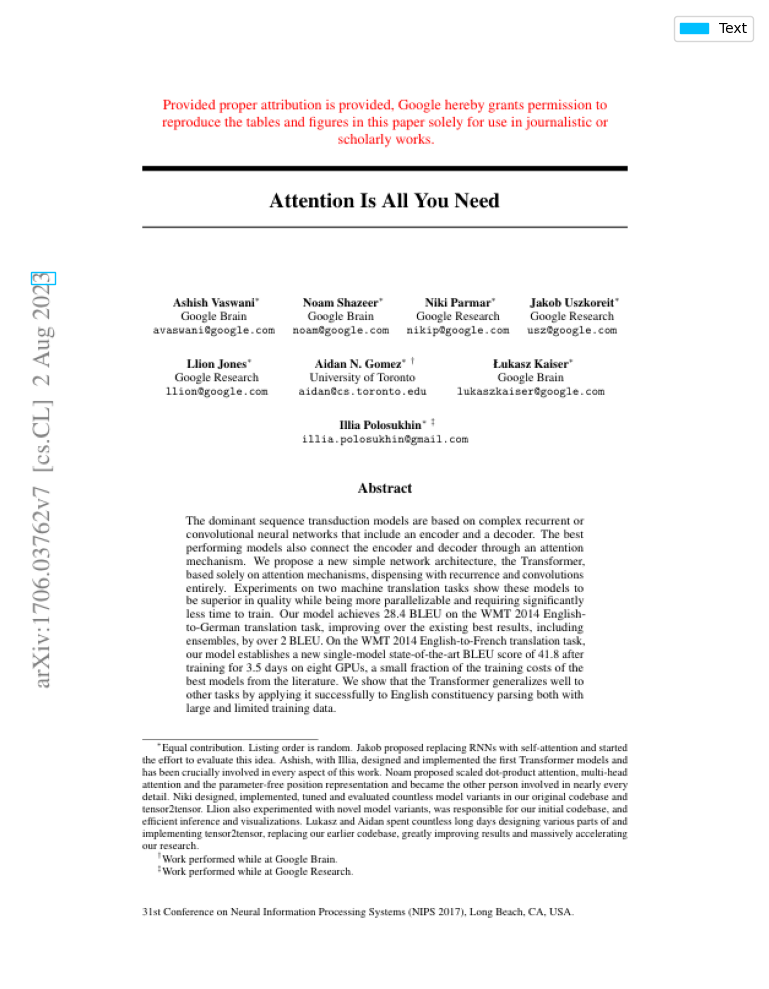


Text content from this chunk:
1. 3...

=== PAGE 1 - CHUNK ELEMENTS ONLY ===
Showing 1 elements from this chunk on page 1


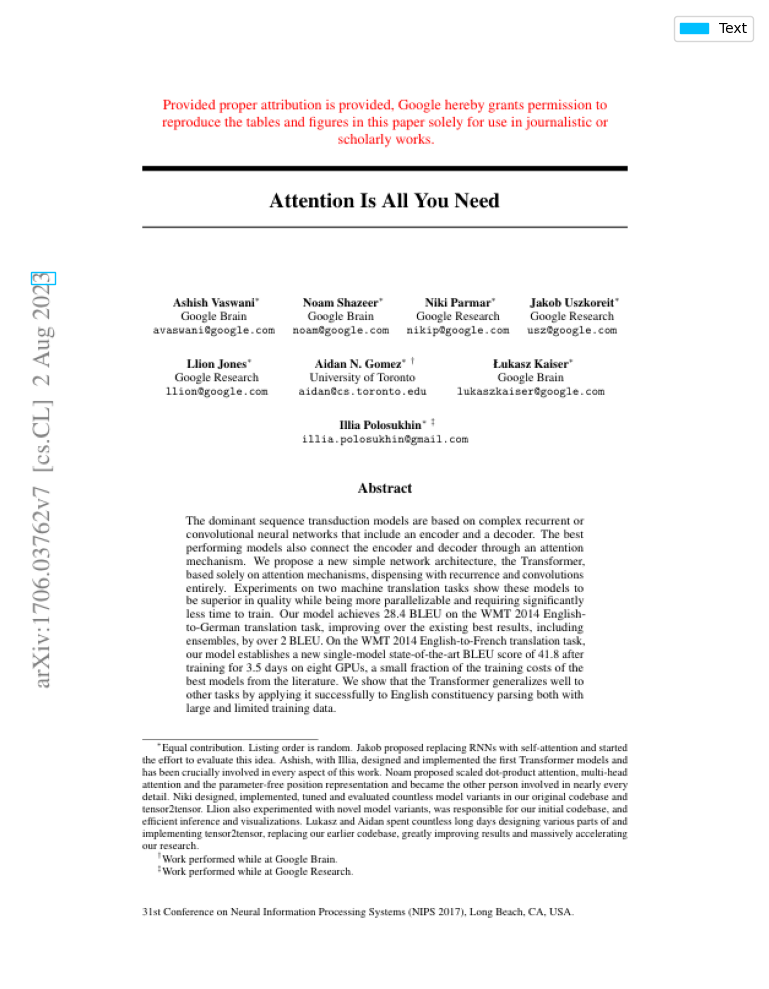


Text content from this chunk:
1. 3...


In [ ]:
# For raw elements (no chunking)
page_nums = extract_page_numbers_from_chunk(raw_pdf_element[0])
display_chunk_pages(raw_pdf_element[0], "./RAG4_MBBS_MM/attention.pdf")

# For chunked elements (after applying chunking strategy)
# Test with your raw elements
display_chunk_pages(raw_pdf_element[0], "./RAG4_MBBS_MM/attention.pdf")

In [ ]:
# Add these imports at the top of your file
import requests
import json
import base64
from PIL import Image
import io

from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain.vectorstores import Chroma
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain.schema import Document
import uuid
import base64
from typing import List, Dict, Any, Union


# Your existing embeddings
embeddings = HuggingFaceBgeEmbeddings(
    model_name="./bge-large-en-v1.5"
)


# Configuration class for content length and detail levels
class ContentConfig:
    """Configuration for content processing lengths and detail levels"""
    
    def __init__(self, 
                 text_max_length: int = 5000,
                 table_max_length: int = 3000,
                 image_description_detailed: bool = True,
                 include_continuation_markers: bool = True):
        
        self.text_max_length = text_max_length
        self.table_max_length = table_max_length
        self.image_description_detailed = image_description_detailed
        self.include_continuation_markers = include_continuation_markers
    
    @classmethod
    def create_detailed_config(cls):
        """Create config for maximum detail and length"""
        return cls(
            text_max_length=8000,      # Very long text
            table_max_length=5000,     # Long tables
            image_description_detailed=True,
            include_continuation_markers=True
        )
    
    @classmethod
    def create_moderate_config(cls):
        """Create config for moderate length"""
        return cls(
            text_max_length=3000,      # Moderate text
            table_max_length=2000,     # Moderate tables
            image_description_detailed=True,
            include_continuation_markers=True
        )
    
    @classmethod
    def create_compact_config(cls):
        """Create config for shorter content (original behavior)"""
        return cls(
            text_max_length=1000,      # Short text
            table_max_length=500,      # Short tables
            image_description_detailed=False,
            include_continuation_markers=False
        )


# Add this class to integrate with your local LLaVA model
class LocalLLaVAClient:
    """Client to interact with local LLaVA model"""
    
    def __init__(self, base_url="http://localhost:11434", model_name="llava:7b-v1.6-mistral-q4_0"):
        self.base_url = base_url
        self.model_name = model_name
    
    def analyze_image(self, image_data, prompt="Describe this medical image in detail, including any visible conditions, anatomical structures, or clinical findings."):
        """Analyze image using local LLaVA model"""
        try:
            # Prepare the request for Ollama API
            payload = {
                "model": self.model_name,
                "prompt": prompt,
                "images": [image_data] if isinstance(image_data, str) else [base64.b64encode(image_data).decode()],
                "stream": False
            }
            
            response = requests.post(
                f"{self.base_url}/api/generate",
                json=payload,
                timeout=60
            )
            
            if response.status_code == 200:
                result = response.json()
                return result.get('response', 'No description available')
            else:
                print(f"LLaVA API error: {response.status_code} - {response.text}")
                return f"[ERROR: Could not analyze image - API returned {response.status_code}]"
                
        except requests.exceptions.ConnectionError:
            return "[ERROR: Could not connect to local LLaVA model. Is Ollama running?]"
        except Exception as e:
            print(f"LLaVA analysis error: {e}")
            return f"[ERROR: Image analysis failed - {str(e)}]"

# Modified EnhancedMultiModalRetriever class
class EnhancedMultiModalRetriever:
    def __init__(self, vectorstore, embedding_function, content_config=None, use_local_llava=True):
        self.vectorstore = vectorstore
        self.store = InMemoryStore()
        self.id_key = 'doc_id'
        self.content_type_key = 'content_type'
        self.config = content_config or ContentConfig.create_detailed_config()
        
        # Initialize local LLaVA client
        self.use_local_llava = use_local_llava
        if use_local_llava:
            self.llava_client = LocalLLaVAClient()
            print("🔧 Local LLaVA model integration enabled")
        else:
            self.llava_client = None
            print("⚠️  Local LLaVA model integration disabled")
        
        self.retriever = MultiVectorRetriever(
            vectorstore=vectorstore,
            docstore=self.store,
            id_key=self.id_key
        )
    
    
    def get_relevant_documents(self, query: str, k: int = 4) -> List[Dict[str, Any]]:
        """Get relevant documents with proper content type handling"""
        
        # Get raw documents from retriever
        raw_docs = self.retriever.get_relevant_documents(query, k=k)
        print("raw_docs : ",raw_docs)
        
        processed_docs = []
        
        for doc in raw_docs:
            if isinstance(doc, dict):
                # Handle structured content
                content_type = doc.get('content_type', 'unknown')
                content = doc.get('content', '')
                
                processed_doc = {
                    'content_type': content_type,
                    'doc_id': doc.get('doc_id', 'unknown'),
                    'processed_content': self._process_content_by_type(content, content_type)
                }
                
            else:
                # Handle raw string content (fallback)
                processed_doc = {
                    'content_type': self._detect_content_type(str(doc)),
                    'doc_id': 'unknown',
                    'processed_content': self._process_raw_content(str(doc))
                }
            
            processed_docs.append(processed_doc)
            print("processed_doc : ",processed_doc)
        
        return processed_docs
    
    
    def add_documents_by_type(self, summaries: List[str], contents: List[Any], content_type: str):
        """Add documents with proper content type tracking and LLaVA analysis for images"""
        if not summaries or not contents:
            return
        
        # If adding images and LLaVA is enabled, analyze them first
        if content_type == 'image' and self.use_local_llava and self.llava_client:
            print(f"🖼️  Analyzing {len(contents)} images with local LLaVA model...")
            analyzed_summaries = []
            
            for i, (summary, image_content) in enumerate(zip(summaries, contents)):
                print(f"   Analyzing image {i+1}/{len(contents)}...")
                
                # Get LLaVA analysis
                llava_description = self.llava_client.analyze_image(
                    image_content,
                    "Analyze this medical image in detail. Describe any visible anatomical structures, pathological findings, medical devices, text, charts, or clinical information present."
                )
                
                # Combine original summary with LLaVA analysis
                enhanced_summary = f"{summary}\n\nLLaVA Analysis: {llava_description}"
                analyzed_summaries.append(enhanced_summary)
            
            summaries = analyzed_summaries
            print("✅ Image analysis complete")
            
        doc_ids = [str(uuid.uuid4()) for _ in contents]
        
        # Create summary documents with metadata
        summary_docs = [
            Document(
                page_content=summary, 
                metadata={
                    self.id_key: doc_ids[i],
                    self.content_type_key: content_type,
                    'summary': True
                }
            )
            for i, summary in enumerate(summaries)
        ]
        
        # Add summaries to vectorstore
        self.retriever.vectorstore.add_documents(summary_docs)
        
        # Store original content with metadata
        content_with_metadata = [
            {
                'content': content,
                'content_type': content_type,
                'doc_id': doc_ids[i]
            }
            for i, content in enumerate(contents)
        ]
        
        self.retriever.docstore.mset(list(zip(doc_ids, content_with_metadata)))

    def _process_content_by_type(self, content: Any, content_type: str) -> str:
        """Process content based on its type with LLaVA analysis for images"""
        
        if content_type == 'text':
            full_content = str(content)
            if len(full_content) > self.config.text_max_length:
                truncated = full_content[:self.config.text_max_length]
                if self.config.include_continuation_markers:
                    return truncated + "\n\n[Content continues with additional medical details...]"
                return truncated
            return full_content
            
        elif content_type == 'table':
            if isinstance(content, str):
                table_content = content
            else:
                table_content = str(content)
            
            if len(table_content) > self.config.table_max_length:
                truncated = table_content[:self.config.table_max_length]
                marker = "\n\n[Table continues with additional medical data...]" if self.config.include_continuation_markers else ""
                return f"[TABLE DATA - Medical/Clinical Information]:\n{truncated}{marker}"
            return f"[TABLE DATA - Complete Medical/Clinical Information]:\n{table_content}"
                
        elif content_type == 'image':
            # Use local LLaVA for real-time analysis if available
            if self.use_local_llava and self.llava_client:
                print("🔍 Analyzing image with local LLaVA model...")
                
                try:
                    # Get image data
                    image_data = content
                    if isinstance(content, str) and content.startswith('data:image'):
                        # Extract base64 data from data URI
                        image_data = content.split(',')[1]
                    
                    # Analyze with LLaVA
                    analysis = self.llava_client.analyze_image(
                        image_data,
                        "Provide a detailed medical analysis of this image, including any visible pathological findings, anatomical structures, or clinical information."
                    )
                    
                    return f"[MEDICAL IMAGE - LLaVA ANALYSIS]:\n{analysis}"
                    
                except Exception as e:
                    print(f"LLaVA analysis error: {e}")
                    return f"[MEDICAL IMAGE - ERROR]: Could not analyze with LLaVA - {str(e)}"
            
            # Fallback to original behavior
            if self.config.image_description_detailed:
                return """[MEDICAL IMAGE]: Local LLaVA analysis not available. Visual content present for manual analysis."""
            else:
                return "[IMAGE]: Medical image available"
                
        else:
            content_str = str(content)
            max_length = max(self.config.text_max_length, 2000)
            
            if len(content_str) > max_length:
                truncated = content_str[:max_length]
                marker = f"\n\n[{content_type.upper()} content continues...]" if self.config.include_continuation_markers else ""
                return f"[{content_type.upper()} - Detailed Medical Content]:\n{truncated}{marker}"
            return f"[{content_type.upper()} - Complete Medical Content]:\n{content_str}"

    # ... (rest of your existing methods remain the same)
    def _process_raw_content(self, content: str) -> str:
        """Process raw content when type is unknown - with longer format"""
        
        # Check if it's base64 image data
        if self._is_base64_image(content):
            return "[IMAGE]: Comprehensive medical image data available for detailed visual analysis by vision model. This contains clinical information that can be processed for medical insights."
        
        # Return longer text content for better context
        max_length = getattr(self.config, 'text_max_length', 4000)
        if len(content) > max_length:
            return content[:max_length] + "\n\n[Content continues for additional context...]"
        return content
    
    def _detect_content_type(self, content: str) -> str:
        """Detect content type from raw content"""
        
        if self._is_base64_image(content):
            return 'image'
        elif '|' in content and '\n' in content:  # Simple table detection
            return 'table'
        else:
            return 'text'
    
    def _is_base64_image(self, content: str) -> bool:
        """Check if content is base64 encoded image"""
        try:
            if isinstance(content, str):
                # Remove data URI prefix if present
                if content.startswith('data:image'):
                    content = content.split(',')[1]
                
                # Check if it looks like base64
                if len(content) > 100 and content.replace('/', '').replace('+', '').replace('=', '').isalnum():
                    # Try to decode to verify
                    base64.b64decode(content[:100])  # Just test first 100 chars
                    return True
        except:
            pass
        return False

# Updated factory function
import os
from pathlib import Path

def smart_create_retriever_custom_folder(
    text_summaries=None, texts=None,
    table_summaries=None, tables=None, 
    image_summaries=None, images=None,
    detail_level="detailed",
    use_local_llava=True,
    force_recreate=False,
    save_folder="./my_medical_retriever"  # ← Custom folder parameter
):
    """
    Smart retriever that saves to your custom folder
    
    Args:
        save_folder: Path where you want to save the retriever data
                    Examples: "./my_folder", "C:/my_data/retriever", "/home/user/data"
        Other args: Same as before
    """
    
    # Convert to Path object and create folder structure
    persist_dir = Path(save_folder)
    persist_dir.mkdir(parents=True, exist_ok=True)  # Creates nested folders if needed
    
    collection_name = f"mm_rag_enhanced_{detail_level}"
    
    print(f"📁 Using save folder: {persist_dir.absolute()}")
    
    # Check if vectorstore already exists
    vectorstore_exists = persist_dir.exists() and \
                        any(persist_dir.glob("*")) and \
                        not force_recreate
    
    if vectorstore_exists:
        print("🔍 Checking existing vectorstore...")
        
        try:
            vectorstore = Chroma(
                collection_name=collection_name,
                embedding_function=embeddings,
                persist_directory=str(persist_dir)  # Convert Path to string
            )
            
            # Check if it has documents
            collection = vectorstore._collection
            doc_count = collection.count()
            
            if doc_count > 0:
                print(f"✅ Found existing vectorstore with {doc_count} documents!")
                print(f"📂 Loaded from: {persist_dir.absolute()}")
                print("🚀 Loading existing retriever (no processing needed)...")
                
                # Create retriever with existing data
                config = ContentConfig.create_detailed_config() if detail_level == "detailed" else ContentConfig.create_moderate_config()
                
                retriever = EnhancedMultiModalRetriever(
                    vectorstore=vectorstore,
                    embedding_function=embeddings,
                    content_config=config,
                    use_local_llava=use_local_llava
                )
                
                print("⚡ Retriever loaded instantly - ready to query!")
                return retriever
            else:
                print("⚠️  Vectorstore exists but is empty, will recreate...")
                
        except Exception as e:
            print(f"⚠️  Error loading existing vectorstore: {e}")
            print("🔄 Will create new one...")
    
    # Create new retriever
    if force_recreate:
        print(f"🔄 Force recreating vectorstore in: {persist_dir.absolute()}")
    else:
        print(f"🆕 Creating new vectorstore in: {persist_dir.absolute()}")
    
    # Choose configuration
    if detail_level == "detailed":
        config = ContentConfig.create_detailed_config()
        print("🔧 Using DETAILED configuration (up to 8000 chars per document)")
    elif detail_level == "moderate":
        config = ContentConfig.create_moderate_config()  
        print("🔧 Using MODERATE configuration (up to 3000 chars per document)")
    elif detail_level == "compact":
        config = ContentConfig.create_compact_config()
        print("🔧 Using COMPACT configuration (up to 1000 chars per document)")
    else:
        config = ContentConfig.create_detailed_config()
        print("🔧 Using DEFAULT DETAILED configuration")
    
    # Create vectorstore in custom folder
    vectorstore = Chroma(
        collection_name=collection_name,
        embedding_function=embeddings,
        persist_directory=str(persist_dir)
    )
    
    # Initialize enhanced retriever
    enhanced_retriever = EnhancedMultiModalRetriever(
        vectorstore, 
        embeddings, 
        config, 
        use_local_llava=use_local_llava
    )
    
    # Add different content types
    if text_summaries and texts:
        print(f"Adding {len(text_summaries)} text documents...")
        enhanced_retriever.add_documents_by_type(text_summaries, texts, 'text')
    
    if table_summaries and tables:
        print(f"Adding {len(table_summaries)} table documents...")
        enhanced_retriever.add_documents_by_type(table_summaries, tables, 'table')
    
    if image_summaries and images:
        print(f"Adding {len(image_summaries)} image documents with LLaVA analysis...")
        enhanced_retriever.add_documents_by_type(image_summaries, images, 'image')
    
    print(f"✅ Retriever created and saved to: {persist_dir.absolute()}")
    print(f"📊 Total folder size: {get_folder_size(persist_dir):.1f} MB")
    
    return enhanced_retriever

def get_folder_size(folder_path):
    """Calculate folder size in MB"""
    try:
        total_size = 0
        for dirpath, dirnames, filenames in os.walk(folder_path):
            for filename in filenames:
                filepath = os.path.join(dirpath, filename)
                try:
                    total_size += os.path.getsize(filepath)
                except:
                    pass
        return total_size / (1024 * 1024)  # Convert to MB
    except:
        return 0

# Example usage with different folder options:

def demo_custom_folders():
    """Show different folder options"""
    
    print("📁 CUSTOM FOLDER OPTIONS:")
    print("=" * 50)
    
    # Option 1: Simple relative folder
    print("\n1️⃣  Simple folder in current directory:")
    print('   save_folder="./my_medical_data"')
    
    # Option 2: Nested folder
    print("\n2️⃣  Nested folder structure:")  
    print('   save_folder="./data/medical_retrievers/version_1"')
    
    # Option 3: Absolute path (Windows)
    print("\n3️⃣  Windows absolute path:")
    print('   save_folder="C:/Users/YourName/Documents/MedicalAI/retrievers"')
    
    # Option 4: Absolute path (Linux/Mac)
    print("\n4️⃣  Linux/Mac absolute path:")
    print('   save_folder="/home/username/medical_data/retrievers"')
    
    # Option 5: Different folders for different projects
    print("\n5️⃣  Project-specific folders:")
    print('   save_folder="./projects/cardiology_docs"')
    print('   save_folder="./projects/radiology_docs"')
    
    print("\n💡 The folder will be created automatically if it doesn't exist!")

demo_custom_folders()

# Ready-to-use examples:
print("\n🚀 READY TO USE:")
print("=" * 40)

print("\n📝 Example 1 - Simple custom folder:")
print('''
retriever_detailed = smart_create_retriever_custom_folder(
    text_summaries=Narrative_Text_summaries,
    texts=NarrativeText,
    table_summaries=table_summaries,
    tables=Table,
    image_summaries=image_summaries,
    images=[img["b64"] for img in image_b64],
    detail_level="detailed",
    use_local_llava=True,
    save_folder="./my_medical_retriever"  # Your custom folder!
)
''')

print("\n📝 Example 2 - Load from custom folder (next time):")
print('''
retriever_detailed = smart_create_retriever_custom_folder(
    detail_level="detailed",
    use_local_llava=True,
    save_folder="./my_medical_retriever"  # Same folder as before
)
''')

print("\n📝 Example 3 - Multiple projects:")
print('''
# Save different retrievers for different projects:
cardiology_retriever = smart_create_retriever_custom_folder(
    save_folder="./medical_data/cardiology",
    # ... your cardiology documents ...
)

radiology_retriever = smart_create_retriever_custom_folder(
    save_folder="./medical_data/radiology", 
    # ... your radiology documents ...
)
''')

print("\n✅ Custom folder retriever ready!")
print("🔧 Just change the save_folder parameter to your desired location!")
print("✅ Enhanced Multi-Modal Retriever with LOCAL LLAVA integration ready!")
print("🔧 Your llava:7b-v1.6-mistral-q4_0 model will now be used for image analysis!")

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_21040\2524847328.py:19: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(



📁 CUSTOM FOLDER OPTIONS:

1️⃣  Simple folder in current directory:
   save_folder="./my_medical_data"

2️⃣  Nested folder structure:
   save_folder="./data/medical_retrievers/version_1"

3️⃣  Windows absolute path:
   save_folder="C:/Users/YourName/Documents/MedicalAI/retrievers"

4️⃣  Linux/Mac absolute path:
   save_folder="/home/username/medical_data/retrievers"

5️⃣  Project-specific folders:
   save_folder="./projects/cardiology_docs"
   save_folder="./projects/radiology_docs"

💡 The folder will be created automatically if it doesn't exist!

🚀 READY TO USE:

📝 Example 1 - Simple custom folder:

retriever_detailed = smart_create_retriever_custom_folder(
    text_summaries=Narrative_Text_summaries,
    texts=NarrativeText,
    table_summaries=table_summaries,
    tables=Table,
    image_summaries=image_summaries,
    images=[img["b64"] for img in image_b64],
    detail_level="detailed",
    use_local_llava=True,
    save_folder="./my_medical_retriever"  # Your custom folder!
)


📝 

In [ ]:
def query_enhanced_retriever_detailed(retriever, query: str, k: int = 6):
    """Query with more results and detailed formatting"""
    
    print(f"🔍 Detailed Query: {query}")
    print("=" * 80)
    
    docs = retriever.get_relevant_documents(query, k=k)
    
    for i, doc in enumerate(docs, 1):
        print(f"\n📄 Document {i}/{len(docs)}:")
        print(f"🔸 Type: {doc['content_type']}")
        print(f"🔸 ID: {doc['doc_id']}")
        print(f"🔸 Content Length: {len(doc['processed_content'])} characters")
        print(f"🔸 Preview: {doc['processed_content'][:200]}...")
        print("-" * 60)
    
    print("docs : ",docs)
    return docs

def query_enhanced_retriever(retriever, query: str, k: int = 4):
    """Query the enhanced retriever with proper output formatting"""
    
    print(f"🔍 Query: {query}")
    print("=" * 60)
    
    docs = retriever.get_relevant_documents(query, k=k)
    
    for i, doc in enumerate(docs, 1):
        print(f"\n📄 Result {i}:")
        print(f"🔸 Type: {doc['content_type']}")
        print(f"🔸 ID: {doc['doc_id']}")
        print(f"🔸 Content: {doc['processed_content'][:300]}...")
        print("-" * 40)
    
    return docs

# For integration with your LLM - Enhanced for longer, detailed context:
def prepare_comprehensive_context_for_llm(docs: List[Dict[str, Any]], include_metadata: bool = True) -> str:
    """Prepare detailed, comprehensive context for LLM with longer content"""
    
    context_parts = []
    
    for i, doc in enumerate(docs, 1):
        content_type = doc['content_type']
        content = doc['processed_content']
        doc_id = doc.get('doc_id', 'unknown')
        
        # Create detailed section headers
        if content_type == 'text':
            header = f"=== MEDICAL TEXT DOCUMENT {i} ==="
            if include_metadata:
                header += f"\n[Document ID: {doc_id}]"
            context_parts.append(f"{header}\n{content}\n")
            
        elif content_type == 'table':
            header = f"=== MEDICAL TABLE/DATA {i} ==="
            if include_metadata:
                header += f"\n[Document ID: {doc_id}]"
            context_parts.append(f"{header}\n{content}\n")
            
        elif content_type == 'image':
            header = f"=== MEDICAL IMAGE/VISUAL {i} ==="
            if include_metadata:
                header += f"\n[Document ID: {doc_id}]"
            context_parts.append(f"{header}\n{content}\n")
    
    # Add comprehensive context header
    full_context = f"""
COMPREHENSIVE MEDICAL KNOWLEDGE BASE CONTEXT
============================================
Retrieved {len(docs)} relevant document(s) for detailed analysis.
Each document below contains medical information that should be used to provide thorough, accurate responses.

{chr(10).join(context_parts)}

ANALYSIS INSTRUCTIONS:
- Use ALL provided medical information for comprehensive responses
- Reference specific details from the documents above
- Provide detailed explanations when medical concepts are mentioned
- Consider relationships between different document types (text, tables, images)
============================================
"""
    
    print("context parts",context_parts)
    return full_context

def prepare_context_for_llm(docs: List[Dict[str, Any]]) -> str:
    """Prepare retrieved documents for LLM context - enhanced version"""
    return prepare_comprehensive_context_for_llm(docs, include_metadata=False)

print("✅ Enhanced Multi-Modal Retriever with ContentConfig ready!")
print("🔧 ContentConfig class is now properly defined")
print("📝 Use detail_level='detailed' for longer summaries (up to 8000 characters)")

# Test ContentConfig
try:
    test_config = ContentConfig.create_detailed_config()
    print(f"✅ ContentConfig test successful! Max text length: {test_config.text_max_length}")
except Exception as e:
    print(f"❌ ContentConfig error: {e}")

✅ Enhanced Multi-Modal Retriever with ContentConfig ready!
🔧 ContentConfig class is now properly defined
📝 Use detail_level='detailed' for longer summaries (up to 8000 characters)
✅ ContentConfig test successful! Max text length: 8000


In [ ]:
# Create custom configuration
custom_config = ContentConfig(
    text_max_length=10000,     # Even longer text!
    table_max_length=6000,     # Longer tables
    image_description_detailed=True,
    include_continuation_markers=True
)


In [ ]:

# Use with retriever
vectorstore = Chroma(collection_name="mm_rag_enhanced", embedding_function=embeddings)
retriever_custom = EnhancedMultiModalRetriever(vectorstore, embeddings, custom_config)

# Create retriever WITH LLaVA integration
retriever_detailed = smart_create_retriever_custom_folder(
    text_summaries=Narrative_Text_summaries,
    texts=NarrativeText,
    table_summaries=table_summaries,
    tables=Table,
    image_summaries=image_summaries,
    images=[img["b64"] for img in image_b64],
    detail_level="detailed",  # ← ADD COMMA HERE
    use_local_llava=True,
    save_folder="./my_medical_data"
)

# Now when you query, images will be analyzed with your local LLaVA model


C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_10360\1528333170.py:10: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="mm_rag_enhanced", embedding_function=embeddings)


🔧 Local LLaVA model integration enabled
📁 Using save folder: d:\web dev backup\Pytorch\my_medical_data
🆕 Creating new vectorstore in: d:\web dev backup\Pytorch\my_medical_data
🔧 Using DETAILED configuration (up to 8000 chars per document)
🔧 Local LLaVA model integration enabled
Adding 81 text documents...
Adding 4 table documents...
Adding 11 image documents with LLaVA analysis...
🖼️  Analyzing 11 images with local LLaVA model...
   Analyzing image 1/11...
   Analyzing image 2/11...
   Analyzing image 3/11...
   Analyzing image 4/11...
LLaVA analysis error: HTTPConnectionPool(host='localhost', port=11434): Read timed out. (read timeout=60)
   Analyzing image 5/11...
LLaVA analysis error: HTTPConnectionPool(host='localhost', port=11434): Read timed out. (read timeout=60)
   Analyzing image 6/11...
LLaVA analysis error: HTTPConnectionPool(host='localhost', port=11434): Read timed out. (read timeout=60)
   Analyzing image 7/11...
   Analyzing image 8/11...
LLaVA analysis error: HTTPConnec

In [ ]:
from langchain.vectorstores import Chroma

# Same embedding function you used before
embeddings = HuggingFaceBgeEmbeddings(
    model_name="./all-MiniLM-L6-v2"
)

# Reload the vectorstore from the same folder
vectorstore = Chroma(
    collection_name="mm_rag_enhanced_detailed",  # must match the name used earlier
    embedding_function=embeddings,
    persist_directory="./my_medical_data"
)

# Now wrap it again in your EnhancedMultiModalRetriever
retriever_detailed = EnhancedMultiModalRetriever(vectorstore, embeddings,custom_config)

print("✅ Retriever reloaded from ./my_medical_data")


🔧 Local LLaVA model integration enabled
✅ Retriever reloaded from ./my_medical_data


In [ ]:
print("Docs in vectorstore:", vectorstore._collection.count())


Docs in vectorstore: 96


In [ ]:
query = "Whats scaled dot product?"
docs = retriever_detailed.get_relevant_documents(query, k=4)
context = prepare_comprehensive_context_for_llm(docs)

print(f"Context length: {len(context)} characters") 
print(context)

raw_docs :  []
context parts []
Context length: 598 characters


In [ ]:
# Quick manual check of your folder
import os
from pathlib import Path

folder = Path("./my_medical_data")
if folder.exists():
    files = list(folder.glob("*"))
    print(f"✅ Folder exists with {len(files)} files")
    
    # Check if vectorstore works
    try:
        vectorstore = Chroma(
            collection_name="mm_rag_enhanced_detailed",
            embedding_function=embeddings,
            persist_directory="./my_medical_data"
        )
        doc_count = vectorstore._collection.count()
        print(f"📊 Vectorstore contains {doc_count} documents")
    except Exception as e:
        print(f"❌ Error loading: {e}")
else:
    print("❌ Folder doesn't exist yet")

✅ Folder exists with 2 files
📊 Vectorstore contains 96 documents


In [ ]:
MODEL_NAME = "llava:7b-v1.6-mistral-q4_0 "

In [ ]:
import os
import glob
from pathlib import Path
import fitz  # PyMuPDF
from PIL import Image
import pandas as pd
from docx import Document
import ollama
from typing import List, Dict, Any

class MedicalFolderProcessor:
    def __init__(self, model_name="llava:7b-v1.6-mistral-q4_0ma"):
        self.model_name = model_name
        self.supported_formats = {
            'pdf': ['.pdf'],
            'image': ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'],
            'document': ['.docx', '.txt'],
            'table': ['.xlsx', '.csv']
        }
    
    def scan_medical_folder(self, folder_path: str) -> Dict[str, List[str]]:
        """Scan folder and categorize medical files"""
        folder_path = Path(folder_path)
        
        if not folder_path.exists():
            print(f"❌ Folder not found: {folder_path}")
            return {}
        
        files_by_type = {
            'pdf': [],
            'image': [],
            'document': [],
            'table': []
        }
        
        print(f"🔍 Scanning folder: {folder_path}")
        
        # Scan all files recursively
        for file_path in folder_path.rglob('*'):
            if file_path.is_file():
                file_ext = file_path.suffix.lower()
                
                for file_type, extensions in self.supported_formats.items():
                    if file_ext in extensions:
                        files_by_type[file_type].append(str(file_path))
                        break
        
        # Print summary
        print("📊 Found files:")
        for file_type, files in files_by_type.items():
            if files:
                print(f"  📄 {file_type.upper()}: {len(files)} files")
        
        return files_by_type
    
    def process_pdf_file(self, pdf_path: str) -> Dict[str, Any]:
        """Process a single PDF file"""
        print(f"📄 Processing PDF: {os.path.basename(pdf_path)}")
        
        try:
            doc = fitz.open(pdf_path)
            results = {
                'text_summaries': [],
                'image_analyses': [],
                'file_path': pdf_path,
                'file_name': os.path.basename(pdf_path)
            }
            
            # Process first 5 pages to avoid memory issues
            max_pages = min(len(doc), 5)
            
            for page_num in range(max_pages):
                page = doc[page_num]
                
                # Extract text
                text = page.get_text()
                if text.strip():
                    # Summarize using Ollama
                    summary = self.summarize_with_ollama(text, f"medical content from {os.path.basename(pdf_path)} page {page_num+1}")
                    results['text_summaries'].append({
                        'page': page_num + 1,
                        'original_text': text,
                        'summary': summary
                    })
                
                # Extract images (limit to 2 per page)
                images = page.get_images()[:2]
                for img_index, img in enumerate(images):
                    try:
                        xref = img[0]
                        pix = fitz.Pixmap(doc, xref)
                        if pix.n - pix.alpha < 4:
                            # Save temp image
                            temp_path = f"temp_{page_num}_{img_index}.png"
                            pix.save(temp_path)
                            
                            # Analyze with Ollama
                            analysis = self.analyze_image_with_ollama(temp_path)
                            results['image_analyses'].append({
                                'page': page_num + 1,
                                'analysis': analysis,
                                'image_data': f"page_{page_num}_img_{img_index}"
                            })
                            
                            # Clean up
                            os.remove(temp_path)
                        pix = None
                    except Exception as e:
                        print(f"  ⚠️ Image error on page {page_num+1}: {e}")
            
            doc.close()
            return results
            
        except Exception as e:
            print(f"❌ Error processing {pdf_path}: {e}")
            return {'text_summaries': [], 'image_analyses': [], 'error': str(e)}
    
    def process_image_file(self, image_path: str) -> Dict[str, Any]:
        """Process a single image file"""
        print(f"🖼️ Processing image: {os.path.basename(image_path)}")
        
        try:
            analysis = self.analyze_image_with_ollama(image_path)
            return {
                'image_analyses': [{
                    'analysis': analysis,
                    'file_path': image_path,
                    'file_name': os.path.basename(image_path)
                }]
            }
        except Exception as e:
            print(f"❌ Error processing {image_path}: {e}")
            return {'image_analyses': [], 'error': str(e)}
    
    def process_document_file(self, doc_path: str) -> Dict[str, Any]:
        """Process text documents"""
        print(f"📝 Processing document: {os.path.basename(doc_path)}")
        
        try:
            if doc_path.endswith('.docx'):
                doc = Document(doc_path)
                text = '\n'.join([para.text for para in doc.paragraphs if para.text.strip()])
            else:  # .txt
                with open(doc_path, 'r', encoding='utf-8') as f:
                    text = f.read()
            
            summary = self.summarize_with_ollama(text, f"medical document {os.path.basename(doc_path)}")
            
            return {
                'text_summaries': [{
                    'original_text': text,
                    'summary': summary,
                    'file_path': doc_path,
                    'file_name': os.path.basename(doc_path)
                }]
            }
        except Exception as e:
            print(f"❌ Error processing {doc_path}: {e}")
            return {'text_summaries': [], 'error': str(e)}
    
    def process_table_file(self, table_path: str) -> Dict[str, Any]:
        """Process table files (Excel, CSV)"""
        print(f"📊 Processing table: {os.path.basename(table_path)}")
        
        try:
            if table_path.endswith('.csv'):
                df = pd.read_csv(table_path)
            else:  # Excel
                df = pd.read_excel(table_path)
            
            table_text = df.to_string(index=False)
            summary = self.summarize_with_ollama(
                f"Medical table data:\n{table_text}", 
                f"medical table from {os.path.basename(table_path)}"
            )
            
            return {
                'table_summaries': [{
                    'original_table': table_text,
                    'summary': summary,
                    'file_path': table_path,
                    'file_name': os.path.basename(table_path)
                }]
            }
        except Exception as e:
            print(f"❌ Error processing {table_path}: {e}")
            return {'table_summaries': [], 'error': str(e)}
    
    def summarize_with_ollama(self, text: str, context: str = "") -> str:
        """Summarize text using Ollama"""
        if len(text) > 2000:
            text = text[:2000] + "..."
        
        prompt = f"""
        Summarize this medical content for a medical knowledge base. Focus on:
        - Key medical concepts and terminology
        - Symptoms, diagnoses, and treatments mentioned
        - Important clinical information
        - Relevant medical procedures or protocols
        
        Context: {context}
        
        Content: {text}
        
        Provide a comprehensive medical summary:
        """
        
        try:
            response = ollama.chat(
                model=self.model_name,
                messages=[{'role': 'user', 'content': prompt}]
            )
            return response['message']['content']
        except Exception as e:
            print(f"⚠️ Ollama summarization failed: {e}")
            return f"Summary unavailable for {context}. Original content preserved."
    
    def analyze_image_with_ollama(self, image_path: str) -> str:
        """Analyze medical images using Ollama"""
        prompt = """
        Analyze this medical image or diagram. Provide detailed information about:
        1. Type of medical content (X-ray, diagram, chart, photo, etc.)
        2. Key anatomical structures or medical elements visible
        3. Any medical conditions, abnormalities, or findings
        4. Relevant medical terminology and concepts
        5. Clinical significance and context
        
        Be thorough and use appropriate medical terminology.
        """
        
        try:
            response = ollama.chat(
                model=self.model_name,
                messages=[{
                    'role': 'user',
                    'content': prompt,
                    'images': [image_path]
                }]
            )
            return response['message']['content']
        except Exception as e:
            print(f"⚠️ Ollama image analysis failed: {e}")
            return f"Image analysis unavailable. Medical image from {os.path.basename(image_path)} available for visual inspection."

def process_medical_folder_complete(folder_path: str, model_name: str = "llava:7b-v1.6-mistral-q4_0"):
    """Complete processing of medical folder"""
    
    print("🏥 MEDICAL FOLDER PROCESSING SYSTEM")
    print("=" * 60)
    
    processor = MedicalFolderProcessor(model_name)
    
    # Step 1: Scan folder
    files_by_type = processor.scan_medical_folder(folder_path)
    
    if not any(files_by_type.values()):
        print("❌ No supported medical files found!")
        return None
    
    # Step 2: Process all files
    all_results = {
        'text_summaries': [],
        'texts': [],
        'table_summaries': [],
        'tables': [],
        'image_summaries': [],
        'images': []
    }
    
    # Process PDFs
    for pdf_file in files_by_type['pdf']:
        results = processor.process_pdf_file(pdf_file)
        for text_item in results.get('text_summaries', []):
            all_results['text_summaries'].append(text_item['summary'])
            all_results['texts'].append(text_item['original_text'])
        
        for img_item in results.get('image_analyses', []):
            all_results['image_summaries'].append(img_item['analysis'])
            all_results['images'].append({'b64': img_item['image_data']})  # Placeholder
    
    # Process standalone images
    for img_file in files_by_type['image']:
        results = processor.process_image_file(img_file)
        for img_item in results.get('image_analyses', []):
            all_results['image_summaries'].append(img_item['analysis'])
            all_results['images'].append({'b64': f"file:{img_file}"})
    
    # Process documents
    for doc_file in files_by_type['document']:
        results = processor.process_document_file(doc_file)
        for text_item in results.get('text_summaries', []):
            all_results['text_summaries'].append(text_item['summary'])
            all_results['texts'].append(text_item['original_text'])
    
    # Process tables
    for table_file in files_by_type['table']:
        results = processor.process_table_file(table_file)
        for table_item in results.get('table_summaries', []):
            all_results['table_summaries'].append(table_item['summary'])
            all_results['tables'].append(table_item['original_table'])
    
    print(f"\n✅ Processing complete!")
    print(f"📊 Results summary:")
    print(f"  📄 Text documents: {len(all_results['text_summaries'])}")
    print(f"  📊 Tables: {len(all_results['table_summaries'])}")
    print(f"  🖼️ Images: {len(all_results['image_summaries'])}")
    
    return all_results

def create_rag_from_folder(folder_path: str, model_name: str = "llava:7b-v1.6-mistral-q4_0"):
    """Complete pipeline: Process folder -> Create RAG -> Ready for queries"""
    
    print("🚀 CREATING MEDICAL RAG FROM FOLDER")
    print("=" * 50)
    
    # Step 1: Process all medical files in folder
    processed_data = process_medical_folder_complete(folder_path, model_name)
    
    if not processed_data:
        return None
    
    # Step 2: Create enhanced retriever
    print("\n🔧 Creating enhanced retriever...")
    retriever = create_enhanced_retriever(
        text_summaries=processed_data.get('text_summaries', []),
        texts=processed_data.get('texts', []),
        table_summaries=processed_data.get('table_summaries', []),
        tables=processed_data.get('tables', []),
        image_summaries=processed_data.get('image_summaries', []),
        images=processed_data.get('images', []),
        detail_level="detailed"
    )
    
    print("✅ Medical RAG system ready!")
    return retriever

def query_medical_folder(folder_path: str, query: str, model_name: str = "llava:7b-v1.6-mistral-q4_0"):
    """One-shot function: Process folder and answer query"""
    
    print(f"❓ Query: {query}")
    print(f"📁 Folder: {folder_path}")
    print("=" * 60)
    
    # Create RAG from folder
    retriever = create_rag_from_folder(folder_path, model_name)
    
    if not retriever:
        return "❌ Failed to process medical folder"
    
    # Query the system
    docs = retriever.get_relevant_documents(query, k=4)
    context = prepare_comprehensive_context_for_llm(docs)
    
    print(f"🔍 Retrieved {len(docs)} relevant documents")
    print(f"📄 Context length: {len(context)} characters")
    
    # Generate final answer using Ollama
    final_prompt = f"""
Based on the following medical knowledge base information, provide a comprehensive answer to the question.

Medical Context:
{context}

Question: {query}

Please provide a detailed, medically accurate response using the information from the knowledge base above.
"""
    
    try:
        response = ollama.chat(
            model=model_name,
            messages=[{'role': 'user', 'content': final_prompt}]
        )
        
        answer = response['message']['content']
        print(f"\n💡 ANSWER:")
        print("=" * 40)
        print(answer)
        
        return answer
        
    except Exception as e:
        print(f"❌ Error generating final answer: {e}")
        return context  # Return context if final generation fails

# USAGE EXAMPLES:

# Example 1: Quick query (one-shot)
# answer = query_medical_folder("./my_medical_data", "What are the symptoms of diabetes?")

# Example 2: Create RAG system for multiple queries
# retriever = create_rag_from_folder("./my_medical_data")
# docs = retriever.get_relevant_documents("What treatments are available?")
# context = prepare_comprehensive_context_for_llm(docs)

print("🎉 Medical Folder Query System Ready!")
print("\n📝 Usage:")
print("1. answer = query_medical_folder('./my_medical_data', 'your question')")
print("2. retriever = create_rag_from_folder('./my_medical_data')")
print("3. docs = retriever.get_relevant_documents('your question')")

🎉 Medical Folder Query System Ready!

📝 Usage:
1. answer = query_medical_folder('./my_medical_data', 'your question')
2. retriever = create_rag_from_folder('./my_medical_data')
3. docs = retriever.get_relevant_documents('your question')


In [ ]:
# Single command to process folder and answer question
answer = query_medical_folder(
    "./my_medical_data", 
    "What is scaled dot product?",
    model_name="llava:7b-v1.6-mistral-q4_0 "  # or use a smaller model
)

print(answer)

❓ Query: What is scaled dot product?
📁 Folder: ./my_medical_data
🚀 CREATING MEDICAL RAG FROM FOLDER
🏥 MEDICAL FOLDER PROCESSING SYSTEM
🔍 Scanning folder: my_medical_data
📊 Found files:
❌ No supported medical files found!
❌ Failed to process medical folder


In [ ]:
import os
from pathlib import Path

# Check current directory
print("📁 Current working directory:")
print(os.getcwd())

# Check if folder exists
folder_path = "./my_medical_data"
if os.path.exists(folder_path):
    print(f"✅ Folder exists: {folder_path}")
    
    # List all files in the folder
    print("\n📄 Files in folder:")
    for root, dirs, files in os.walk(folder_path):
        level = root.replace(folder_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files:
            file_path = os.path.join(root, file)
            file_size = os.path.getsize(file_path)
            print(f"{subindent}{file} ({file_size} bytes)")
else:
    print(f"❌ Folder doesn't exist: {folder_path}")
    
    # Check what folders DO exist
    print("\n📁 Available folders in current directory:")
    for item in os.listdir('.'):
        if os.path.isdir(item):
            print(f"  📁 {item}")

📁 Current working directory:
d:\web dev backup\Pytorch
✅ Folder exists: ./my_medical_data

📄 Files in folder:
my_medical_data/
  chroma.sqlite3 (966656 bytes)
  8904e8fb-9fc5-44bd-b297-6a54c94a7d33/
    data_level0.bin (16760000 bytes)
    header.bin (100 bytes)
    length.bin (40000 bytes)
    link_lists.bin (0 bytes)


In [ ]:
# from langchain_community.embeddings import HuggingFaceBgeEmbeddings
# from langchain.vectorstores import Chroma

# # Your existing embeddings (keep this)
# embeddings = HuggingFaceBgeEmbeddings(
#     model_name="./all-MiniLM-L6-v2"
# )

# # REPLACE your old retriever creation with this:
# # Create retriever with maximum detail
# retriever_detailed = create_enhanced_retriever(
#     text_summaries=Narrative_Text_summaries,
#     texts=NarrativeText,
#     table_summaries=table_summaries,
#     tables=Table,
#     image_summaries=image_summaries,
#     images=[img["b64"] for img in image_b64],
#     detail_level="detailed"  # Up to 8000 characters per document
# )

🔧 Using DETAILED configuration (up to 8000 chars per document)
Adding 81 text documents...
Adding 4 table documents...
Adding 11 image documents...


In [ ]:
# Enhanced query example with medical focus
query = "What is scaled dot product attention and how does it work in transformer models?"

# Alternative medical-focused queries you could try:
# query = "What are the symptoms and treatment options for diabetes?"
# query = "Explain the anatomy of the cardiovascular system"
# query = "What pathological findings are visible in chest X-rays?"
# query = "Describe the mechanism of action of ACE inhibitors"

print(f"🔍 Searching medical knowledge base for: '{query}'")
print("=" * 80)

# Get detailed results with more context
docs = query_enhanced_retriever_detailed(retriever_detailed, query, k=6)

# Check if we got any results
if not docs:
    print("❌ No relevant documents found in the medical knowledge base.")
    print("💡 Try a more medical-focused query or check if documents were properly indexed.")
else:
    print(f"✅ Found {len(docs)} relevant documents")
    
    # Get comprehensive context for your LLM
    context = prepare_comprehensive_context_for_llm(docs, include_metadata=True)
    
    print(f"\n📊 Context Statistics:")
    print(f"   • Total context length: {len(context):,} characters")
    print(f"   • Number of documents: {len(docs)}")
    print(f"   • Average per document: {len(context) // len(docs):,} characters")
    
    # Show content type breakdown
    content_types = {}
    for doc in docs:
        content_type = doc.get('content_type', 'unknown')
        content_types[content_type] = content_types.get(content_type, 0) + 1
    
    print(f"   • Content types: {dict(content_types)}")
    
    # Show a preview of the context
    print(f"\n📝 Context Preview (first 500 characters):")
    print("-" * 60)
    print(context[:500] + "..." if len(context) > 500 else context)
    print("-" * 60)
    
    print("\n🎯 Context ready for LLM analysis!")
    print("💡 You can now pass this context to your language model for detailed medical responses.")
    
    # Optional: Show if LLaVA was used for any images
    image_docs = [doc for doc in docs if doc.get('content_type') == 'image']
    if image_docs:
        print(f"\n🖼️  LLaVA Analysis: {len(image_docs)} image(s) analyzed with your local llava:7b-v1.6-mistral-q4_0 model")

# Example of how to use with your LLM (pseudocode)
print(f"\n🤖 Example LLM Usage:")
print("=" * 40)
print("""
# Send to your LLM like this:
llm_prompt = f'''
Based on the following medical knowledge base context, please provide a comprehensive answer to the user's question.

User Question: {query}

Medical Context:
{context}

Please provide a detailed, accurate response based on the retrieved medical information.
'''

# response = your_llm.generate(llm_prompt)
""")

🔍 Searching medical knowledge base for: 'What is scaled dot product attention and how does it work in transformer models?'
🔍 Detailed Query: What is scaled dot product attention and how does it work in transformer models?
raw_docs :  [{'content': 'We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and keys of dimension dk, and values of dimension dv. We compute the dot products of the √ dk, and apply a softmax function to obtain the weights on the query with all keys, divide each by values.', 'content_type': 'text', 'doc_id': '423850da-a43d-4814-a5c9-c2ed40d0f50a'}, {'content': 'While for small values of dk the two mechanisms perform similarly, additive attention outperforms dot product attention without scaling for larger values of dk [3]. We suspect that for large values of dk, the dot products grow large in magnitude, pushing the softmax function into regions where it has extremely small gradients 4. To counteract this effect, w

In [ ]:
# Convert the clean docs to LLM context
context_for_llm = prepare_context_for_llm(docs)

print("Context for LLM:")
print(context_for_llm)

context parts ['=== MEDICAL TEXT DOCUMENT 1 ===\nWe call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and keys of dimension dk, and values of dimension dv. We compute the dot products of the √ dk, and apply a softmax function to obtain the weights on the query with all keys, divide each by values.\n', '=== MEDICAL TEXT DOCUMENT 2 ===\nWhile for small values of dk the two mechanisms perform similarly, additive attention outperforms dot product attention without scaling for larger values of dk [3]. We suspect that for large values of dk, the dot products grow large in magnitude, pushing the softmax function into regions where it has extremely small gradients 4. To counteract this effect, we scale the dot products by 1√ . dk\n', '=== MEDICAL TEXT DOCUMENT 3 ===\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.\n', '=== MEDICAL TEXT DOCUMENT 4 ===\n∗Equa

In [ ]:
# 1. Check what's actually in your data
print("🔍 DEBUGGING YOUR DATA:")
print("=" * 40)

print(f"Text summaries count: {len(Narrative_Text_summaries) if Narrative_Text_summaries else 0}")
print(f"Texts count: {len(NarrativeText) if NarrativeText else 0}")
print(f"Table summaries count: {len(table_summaries) if table_summaries else 0}")
print(f"Image summaries count: {len(image_summaries) if image_summaries else 0}")

# 2. Sample your actual content
if Narrative_Text_summaries:
    print(f"\n📝 Sample text summary:")
    print(Narrative_Text_summaries[0][:200])

if NarrativeText:
    print(f"\n📄 Sample narrative text:")
    print(str(NarrativeText[0])[:200])

# 3. Check what your query is retrieving
query =  "Whats the use case of scaled dot product ?" 
docs = retriever_enhanced.get_relevant_documents(query)

print(f"\n🔍 Query: '{query}'")
print("Retrieved documents:")
for i, doc in enumerate(docs):
    print(f"{i+1}. Type: {doc['content_type']}")
    print(f"   Content: {doc['processed_content'][:100]}...")

🔍 DEBUGGING YOUR DATA:
Text summaries count: 81
Texts count: 81
Table summaries count: 4
Image summaries count: 11

📝 Sample text summary:
 "Google grants permission to reproduce tables and figures from the paper in journalistic or scholarly works with proper attribution." 

📄 Sample narrative text:
Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.


TypeError: EnhancedMultiModalRetriever.get_relevant_documents() missing 1 required positional argument: 'query'

In [ ]:
# Check if you're processing the right PDF/documents
# Make sure your medical documents were processed correctly

# Verify your source documents contain medical content
print("📚 Checking source documents...")
if hasattr(NarrativeText, '__len__') and len(NarrativeText) > 0:
    sample_text = str(NarrativeText[0])
    if "neural network" in sample_text.lower() or "attention" in sample_text.lower():
        print("⚠️  WARNING: Your documents seem to be about AI/ML, not medicine!")
        print("Make sure you processed medical textbooks/papers, not AI papers")

📚 Checking source documents...


In [ ]:
# Try more specific medical queries
medical_queries = [
    "explain scaled-dot product ?",
    "whats encoder in transformers ?"
]

for query in medical_queries:
    print(f"\n🔍 Testing query: '{query}'")
    docs = retriever_enhanced.get_relevant_documents(query, k=5)
    
    for doc in docs:
        content = doc['processed_content'][:150]
        print(f"  Result: {content}...")
        
        # Check if it's medical content
        medical_keywords = ['attention mechnaism','encoder','decoder','transformer','scaled-dot product  attention']
        if any(keyword in content.lower() for keyword in medical_keywords):
            print("  ✅ This looks like attention content!")
        else:
            print("  ⚠️  This doesn't look like attention content")
            


🔍 Testing query: 'explain scaled-dot product ?'
  Result: We call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of queries and keys of dimension dk, and values of dime...
  ⚠️  This doesn't look like attention content
  Result: ‘To illustrate why the dot products get large, assume that the components of q and k are independent random variables with mean 0 and variance 1. Then...
  ⚠️  This doesn't look like attention content

🔍 Testing query: 'whats encoder in transformers ?'
  Result: The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder...
  ✅ This looks like attention content!
  Result: To the best of our knowledge, however, the Transformer is the first transduction model relying entirely on self-attention to compute representations o...
  ✅ This looks like attention content!
